# Degue Outbreak in Tainan, 2015


Subjects
---
- **Nonlinear Data Fitting**, find out the simple relation between the data and theoretic result;
- **Principal Components Analysis**, how to find out the trends from the data? How to make data reduction?

In [1]:
%matplotlib inline

In [43]:
# pip install git+https://github.com/quantopian/qgrid
# conda install ipywidgets
import qgrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
qgrid.nbinstall(overwrite=True) 

In [ ]:
qgrid.set_defaults(remote_js=True, precision=4)

Data Sources
---
<a href="http://data.tainan.gov.tw/dataset/dengue-dist">Tainan City Government</a>

In [4]:
!head data/1018-en.csv

index,date,district,alley,street,longitude,latitude
1,2015/1/6,關廟區,南花里,明德街,22.987,120.234
2,2015/1/19,東區,文聖里,裕文路,22.979,120.197
3,2015/5/21,北區,六甲里,和緯路,22.997,120.198
4,2015/5/24,北區,六甲里,和緯路,22.997,120.198
5,2015/6/4,北區,六甲里,和緯路,23.005,120.209
6,2015/6/11,北區,正覺里,公園路,23.005,120.195
7,2015/6/14,北區,正覺里,公園路,22.999,120.197
8,2015/6/18,安南區,州北里,長和路,22.993,120.229
9,2015/6/21,北區,成德里,西門路,23.036,120.213


Subjects
---

- update the last data and make observation again

**Note**

The data downloaded from offical site were wrongly encoded in different codes. To capable of accessing the data, we have to re-encode the data. You can download it from github:

https://github.com/cchuang2009/math-2015-2/1/data/1018-en.csv

In [3]:
df = pd.DataFrame.from_csv('data/1018-en.csv',index_col=0,parse_dates=[0])
#df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20503 entries, 1 to 20507
Data columns (total 6 columns):
date         20503 non-null object
district     20503 non-null object
alley        20503 non-null object
street       20352 non-null object
longitude    20503 non-null float64
latitude     20503 non-null float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
# before we accumulate the number of suspectives at each day, we add a new colume, num=1
df['num']=1

In [6]:
cases=df[['date','num']]
cases.tail(3)

,date,num
index,,
20505,2015-10-18,1
20506,2015-10-18,1
20507,2015-10-18,1


In [7]:
qgrid.show_grid(df)


Accumulation numbers of cases:
--

In [16]:
#  grouped data with respect to the date
cases_group = cases.groupby('date');
cases_group.size()

date
2015-01-06      1
2015-01-19      1
2015-05-21      1
2015-05-24      1
2015-06-04      1
2015-06-11      1
2015-06-14      1
2015-06-18      1
2015-06-21      1
2015-06-22      1
2015-06-23      1
2015-06-24      1
2015-06-26      2
2015-06-29      1
2015-07-01      2
2015-07-03      2
2015-07-04      2
2015-07-05      3
2015-07-06      1
2015-07-07      2
2015-07-08      1
2015-07-10      1
2015-07-11      3
2015-07-12      5
2015-07-13      4
2015-07-14      3
2015-07-15      3
2015-07-16      6
2015-07-17      6
2015-07-18      4
             ... 
2015-09-19    309
2015-09-20    361
2015-09-21    604
2015-09-22    599
2015-09-23    584
2015-09-24    712
2015-09-25    487
2015-09-26    373
2015-09-27    247
2015-09-28    444
2015-09-29    294
2015-09-30    423
2015-10-01    433
2015-10-02    380
2015-10-03    283
2015-10-04    189
2015-10-05    325
2015-10-06    285
2015-10-07    286
2015-10-08    280
2015-10-09    206
2015-10-10    173
2015-10-11    166
2015-10-12    218
2015-

In [17]:
# calculate the accumulated number of cases

cases_totals = cases_group.sum()
#cases_totals.sort(columns='num').head()
cases_totals.tail()

,num
date,
2015-10-14,185
2015-10-15,173
2015-10-16,184
2015-10-17,109
2015-10-18,121


Make the first observation
---

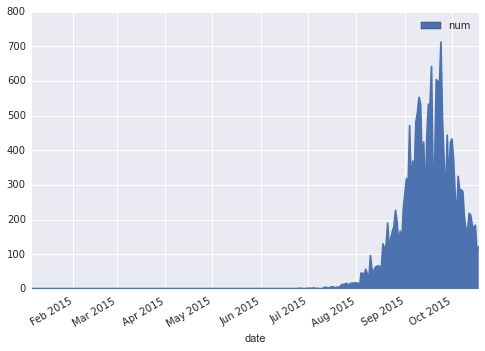

In [44]:
import warnings
warnings.filterwarnings('ignore')
my_plot = cases_totals.plot(kind='area')

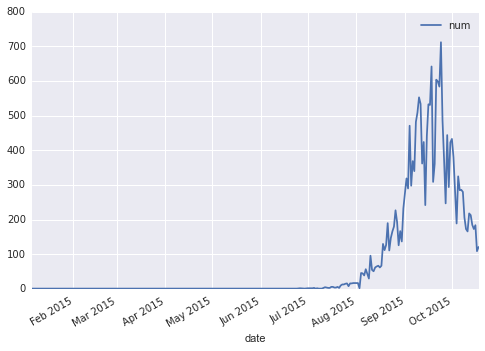

In [45]:
# or this one is better
my_plot = cases_totals.plot()

We have observed the serious condition about dengue spreading we have to face; however, the situation of the dengue fever is still not discussed. Stay tune, we will make more detailed  survey.

<div align="center" ><big> <font color="red" >Too much data to make observation frustrated <br>and too few to get uncertain.</font></big></div>

Resample

   &nbsp;&nbsp;&nbsp;**cases=df[['date','num']]** 

by other units (week, or month etc)

If we want to look at the data by month, we can easily resample and sum it all up. You’ll notice I’m using ‘<font color="red">*M*</font>’ as the unit of time period for resampling which means the data should be resampled on a month boundary.

In [26]:
cases_patterns = cases.set_index('date')
cases_patterns.head()
#cases_patterns.tail()

,num
date,
2015-01-06,1
2015-01-19,1
2015-05-21,1
2015-05-24,1
2015-06-04,1


In [27]:
cases_patterns.resample('M',how=sum)

,num
date,
2015-01-31,2
2015-02-28,NaN
2015-03-31,NaN
2015-04-30,NaN
2015-05-31,2
2015-06-30,11
2015-07-31,202
2015-08-31,3023
2015-09-30,13054


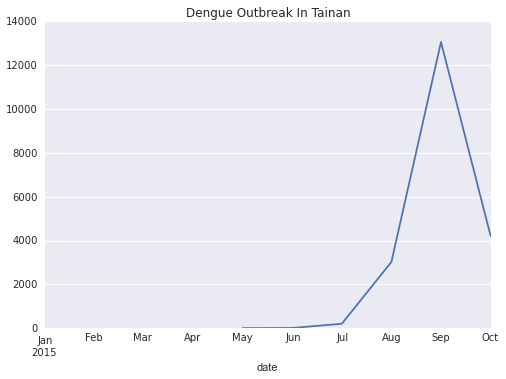

In [46]:
cases_plot = cases_patterns.resample('M',how=sum)\
            .plot(title="Dengue Outbreak In Tainan",legend=None)


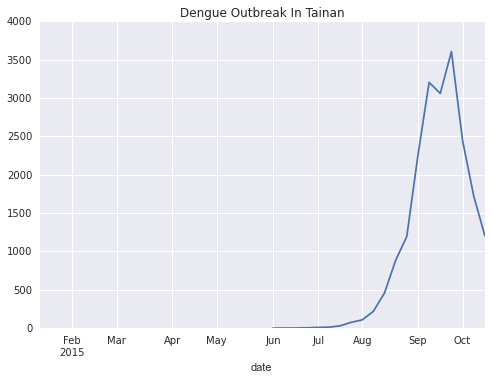

In [47]:
cases_plot = (cases_patterns.resample('W',how=sum))\
            .plot(title="Dengue Outbreak In Tainan",legend=None)

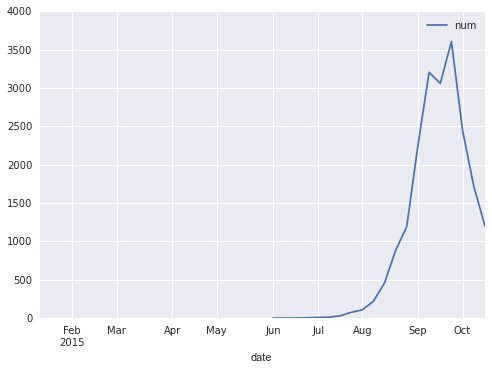

In [48]:
df3_1018=cases_patterns.resample('w',how=sum)
df3_1018.plot()

In [33]:
qgrid.show_grid(df3_1018)

In [35]:
# cut off some data ahead
df3_1018['ind']=np.arange(1,len(df3_1018)+1)
df4_1018=df3_1018[21:]
df4_1018.head()

,num,ind
date,,
2015-06-07,1,22
2015-06-14,2,23
2015-06-21,2,24
2015-06-28,5,25
2015-07-05,10,26


Nonlinear Data Fitting
---
The linear approximation is not appropriate for the update data obviously. We try to fit the update data by nonlinea relation.

In [37]:
import scipy.optimize as opt
def f(x, a0, b0, c0):
    return a0* np.exp(-b0 * (x/20.-c0)**2) 

In [38]:
x=df4_1018['ind']
ydata=df4_1018['num']
popt,pcov= opt.curve_fit(f, x, ydata)

In [39]:
yfit=f(x,popt[0],popt[1],popt[2])

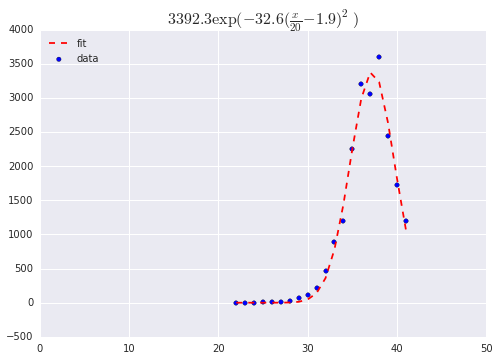

In [42]:
plt.scatter(x,ydata,label='data')
plt.plot(x,yfit,'r--',label='fit')
plt.title(r'$%.1f \exp(- %.1f (\frac{x}{20}- %.1f)^2)$' % \
          (popt[0],popt[1],popt[2]), size=16 )
plt.xlim([0,50])
plt.legend(loc='upper left')

Question
---
- How about the change of numbers of infected in the next future?
- Predict how many infected cases during the forcoming December would be.
- Did the Typhoon, cookoo, make the situation much worse?

Coverage
---
Show me the dangerous courage that dengue has occupied



Note
---
Here, we will use the python package, basemap, to make the epidemic map. If you had installed "anaconda", you have to install the basemap by opening a terminal shell and execute the following command to install:

```shell
> [$whereCondaInstall]\bin\conda install basemap
```

[\$whereCondaInstall] is the real direction of Canda installed. We also require "JSAnimation" to make animation. Download the source and install it in the extracted directed by:

```shell
> [$whereCondaInstall]\bin\python setup.py install 
```

In [41]:
from numpy import genfromtxt


data_file = genfromtxt('data/1018-en.csv', delimiter=',')

date=data_file[1:,1]
lats=data_file[1:,5]
lons=data_file[1:,6]

In [4]:
lats[:5],lons[:5]

(array([ 22.987,  22.979,  22.997,  22.997,  23.005]),
 array([ 120.234,  120.197,  120.198,  120.198,  120.209]))

In [ ]:
lats[:5],lons[:5]

In [50]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

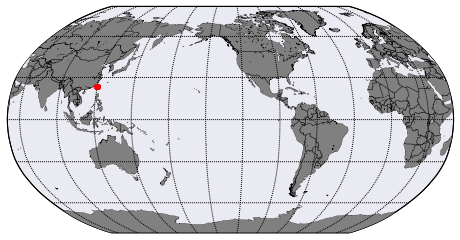

In [51]:
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines(linewidth=0.2)
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=6)

In [52]:
#fig = plt.figure(figsize=(5,5)) 
map_width=5
map_height=5

Taiwan is a tiny country shown in global. Let's put our focus centred at Tainan.  

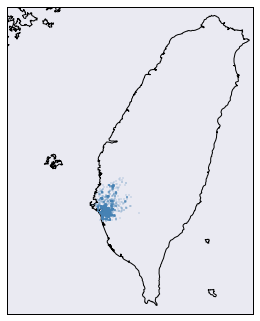

In [53]:
map = Basemap(width=map_width,height=map_height,
              projection='mill', resolution='h', llcrnrlon=119.0 , llcrnrlat=21.8,
              urcrnrlon=122.05, urcrnrlat=25.4, lat_ts =20)

map.drawcoastlines()
map.drawmapboundary()
map.plot(lons,lats,latlon=True,marker='o', lw=0, markersize=2,color="steelblue",alpha=0.2)

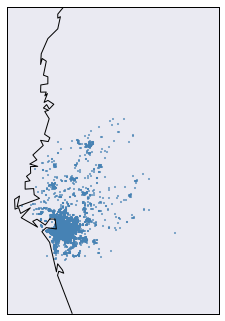

In [54]:
# Dispalay data by scatter
map = Basemap(projection='mill' , 
                              resolution='i' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

map.scatter(lons, lats, latlon=True,s=3, marker='o',  color="steelblue", alpha=0.8); 

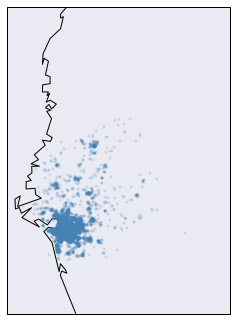

In [56]:
map = Basemap(resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8,lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

map.plot(lons,lats,latlon=True,marker='o', lw=0, markersize=3, color="steelblue",alpha=0.2)

 Make a simple animation to show how it spreaded in the area.

In [14]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

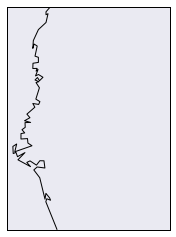

In [15]:
map = Basemap(width=map_width,height=map_height,resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8,lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

In [16]:
len(np.isnan(lats[:-1])),len((lons[:-1]))

(20502, 20502)


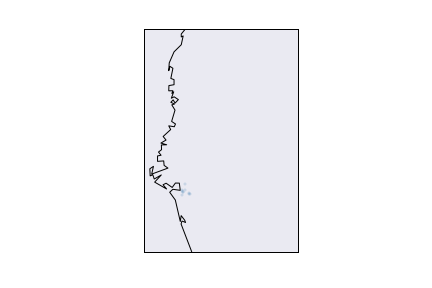
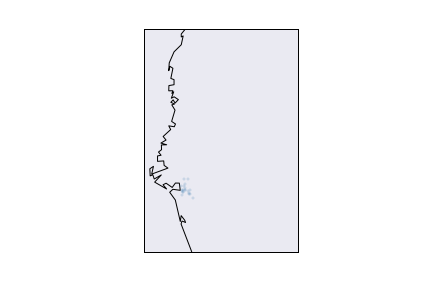
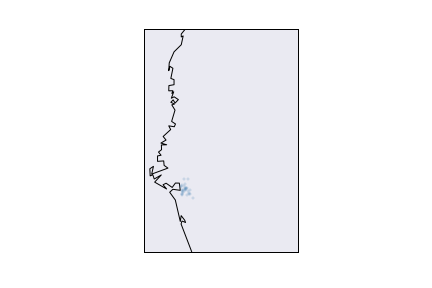
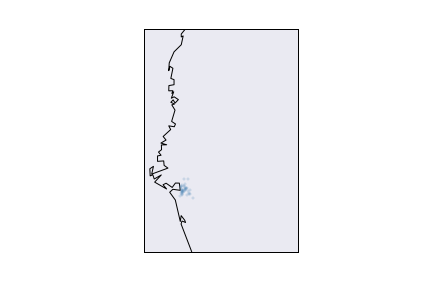
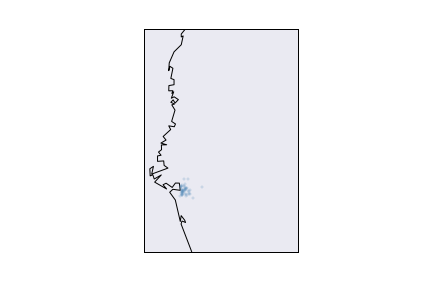
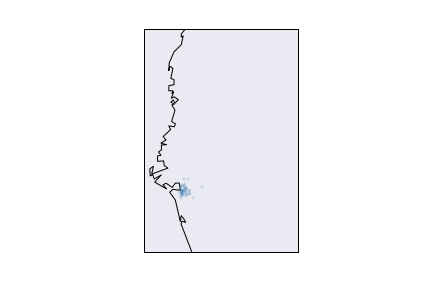
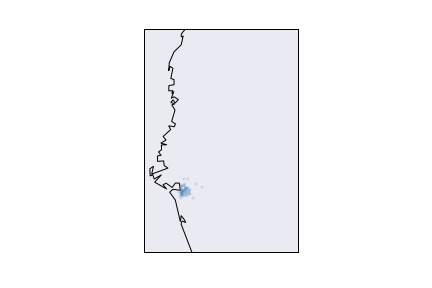
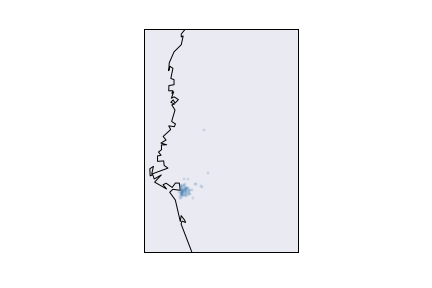
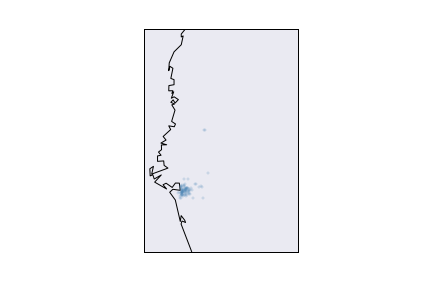
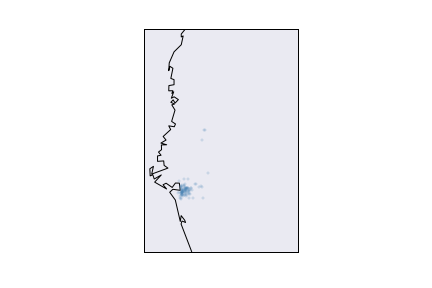
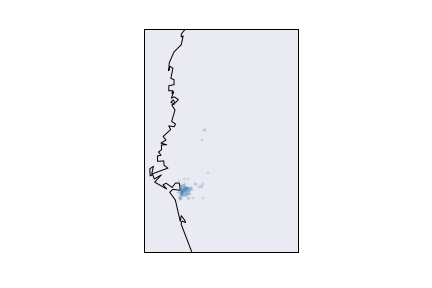
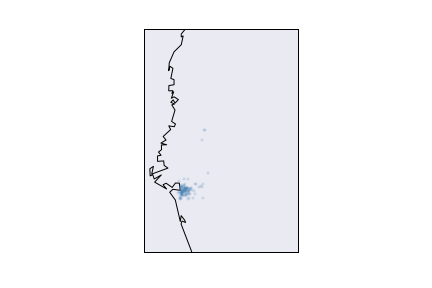
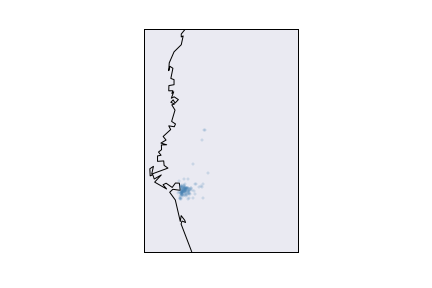
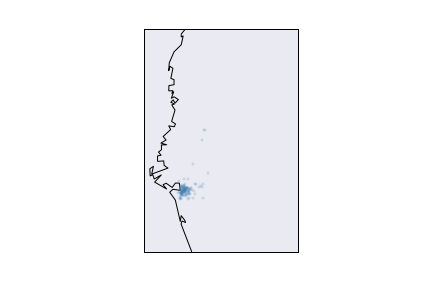
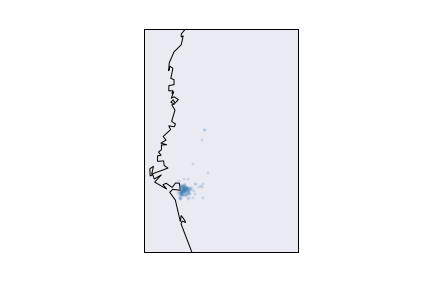
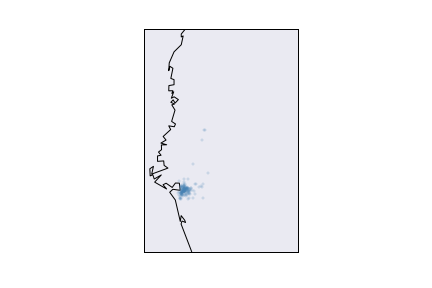
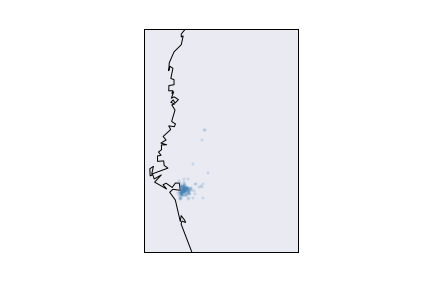
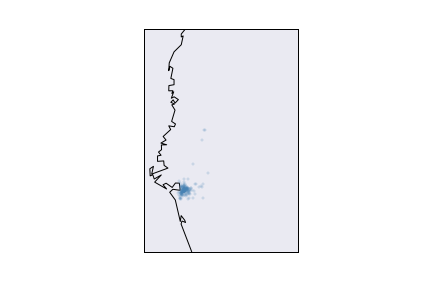
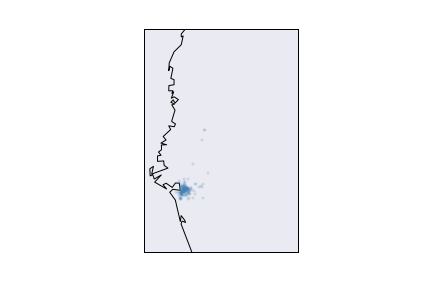
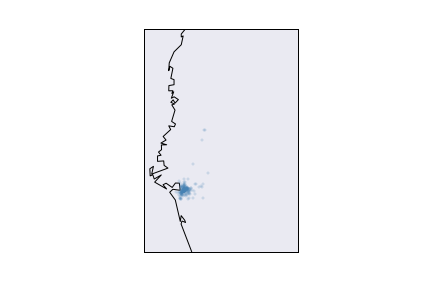
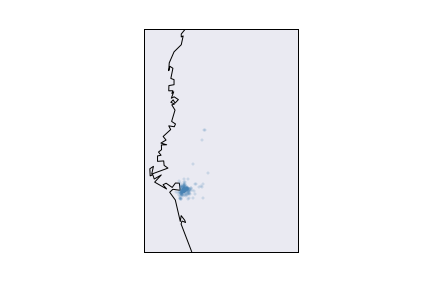
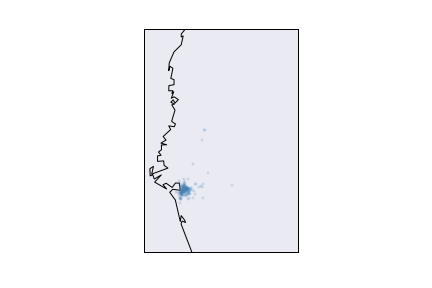
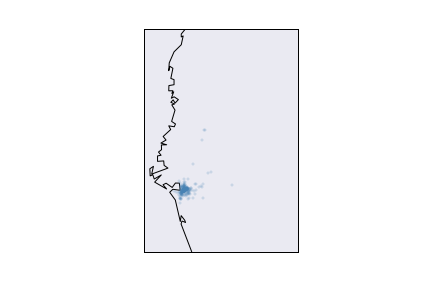
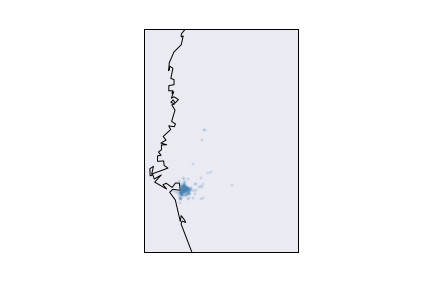
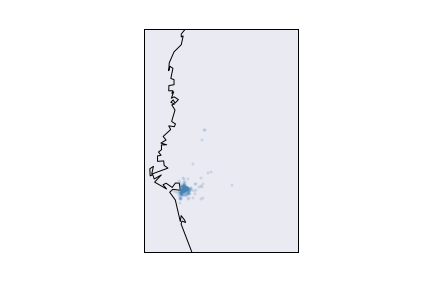
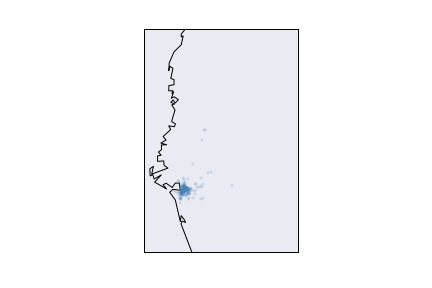
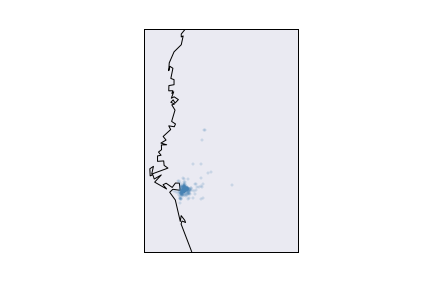
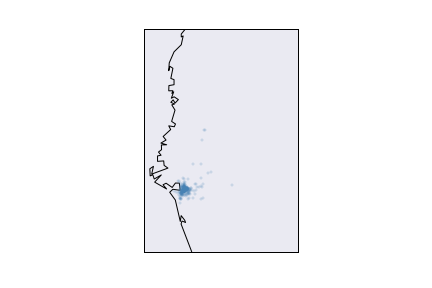
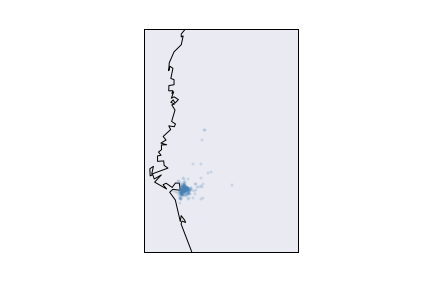
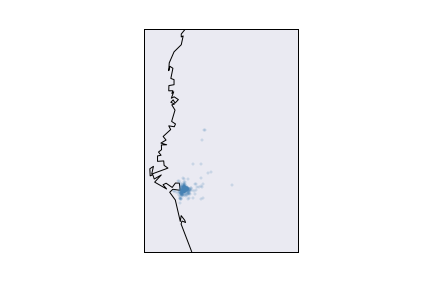
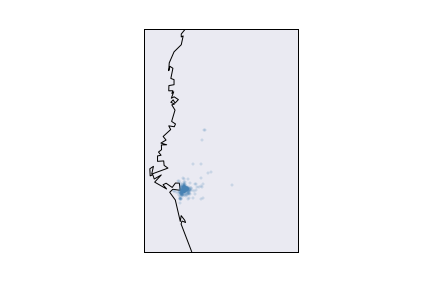
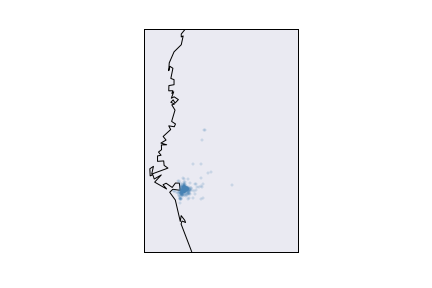
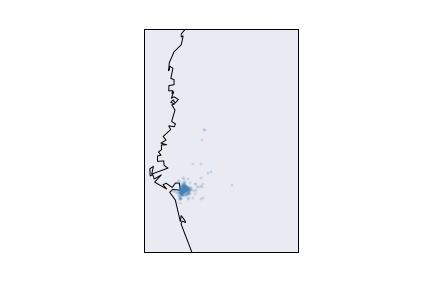
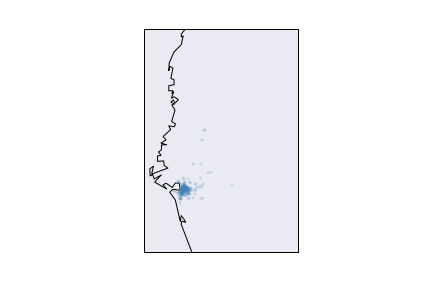
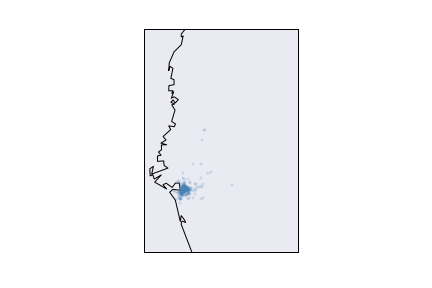
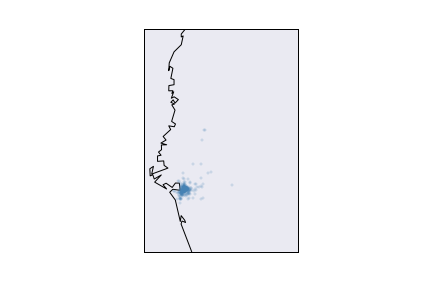
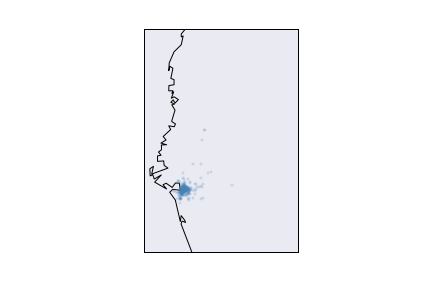
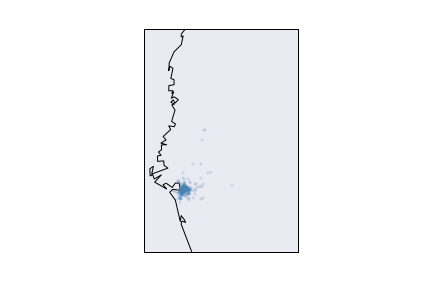
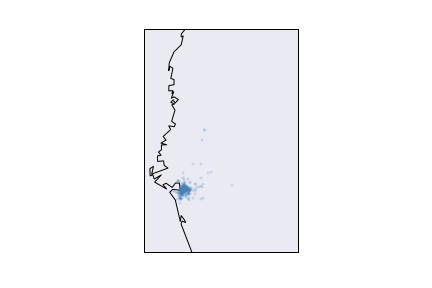
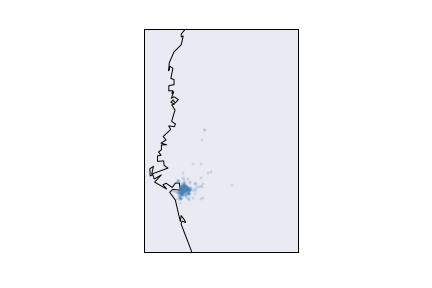
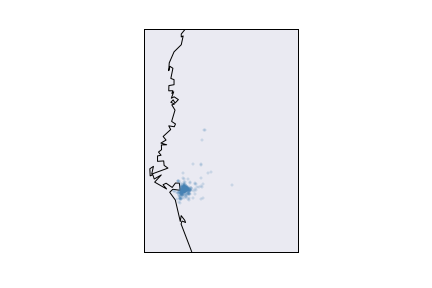
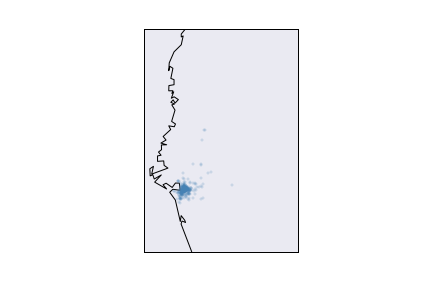
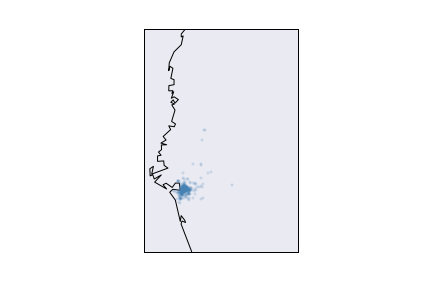
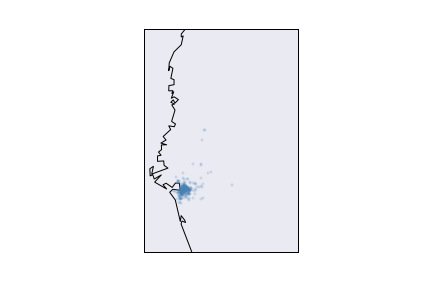
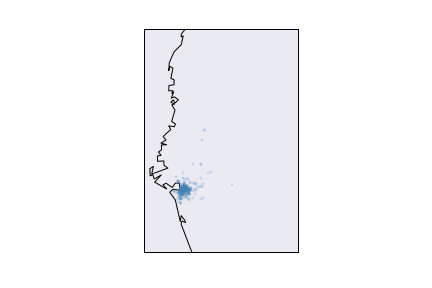
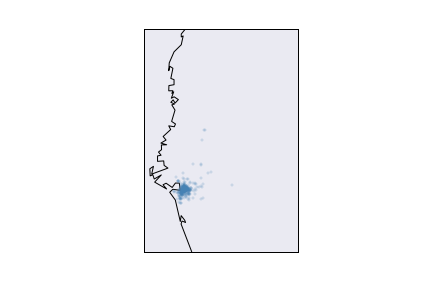
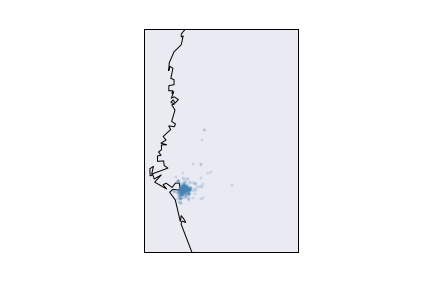
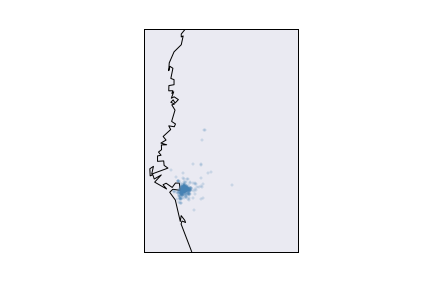
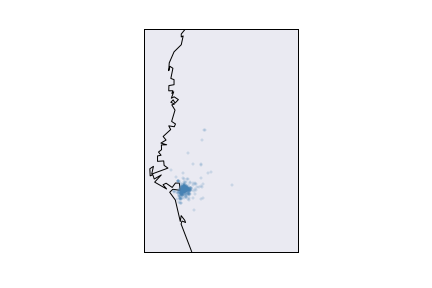
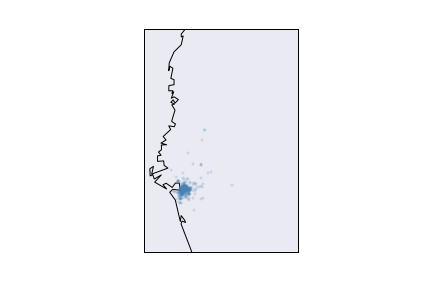
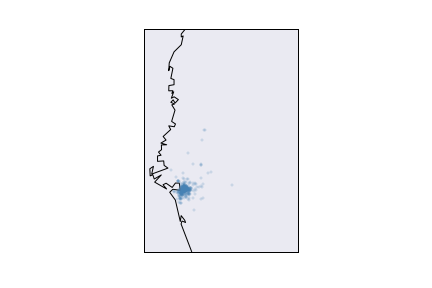
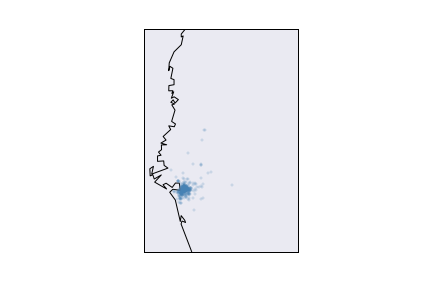
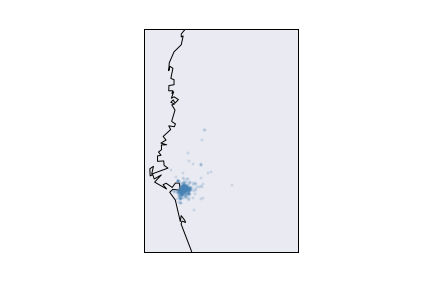
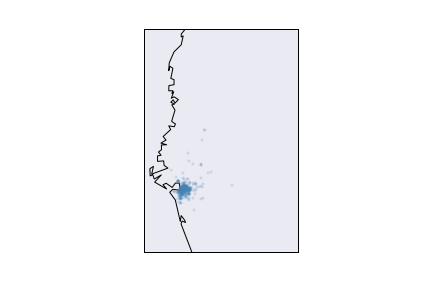
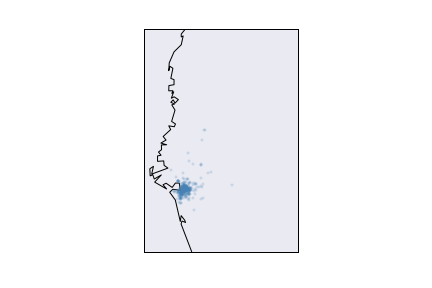
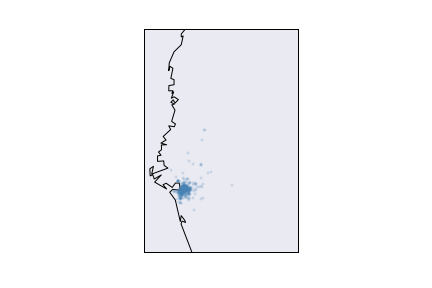
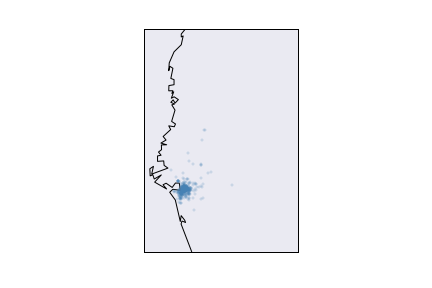
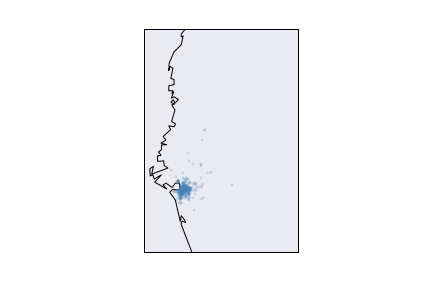
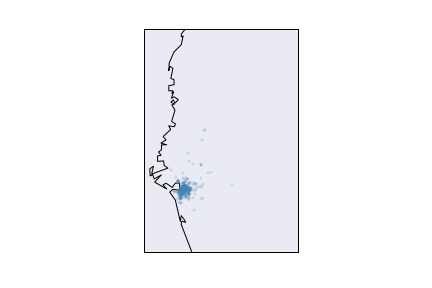
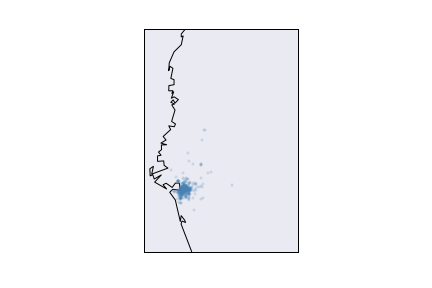
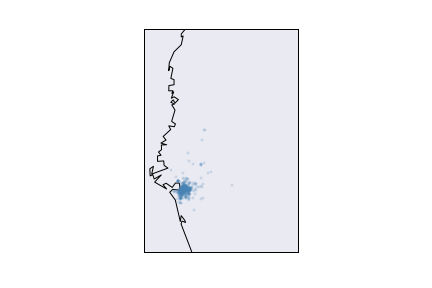
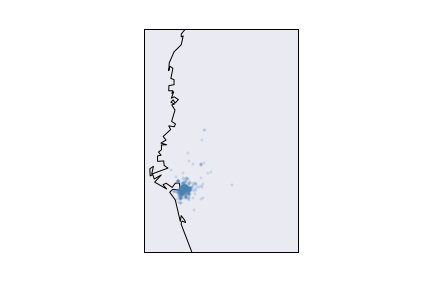
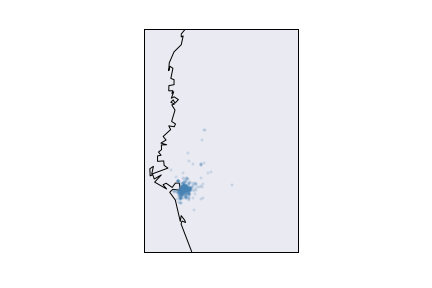
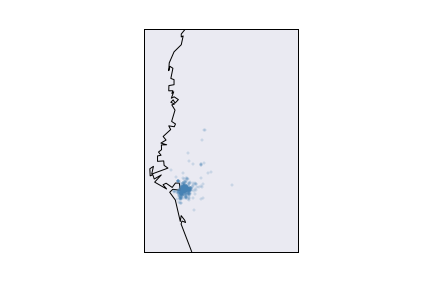
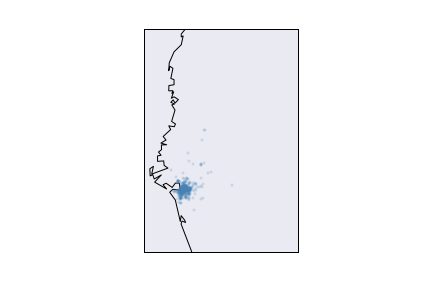
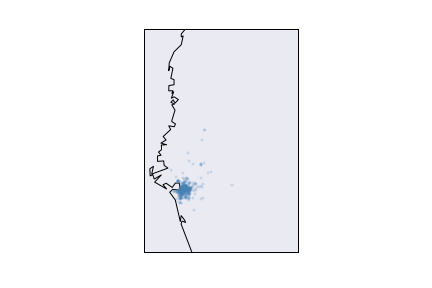
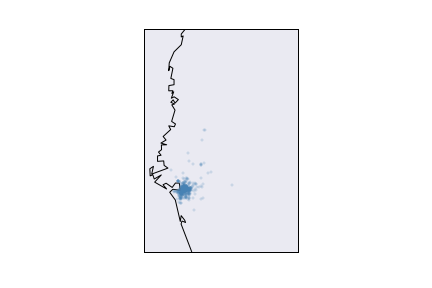
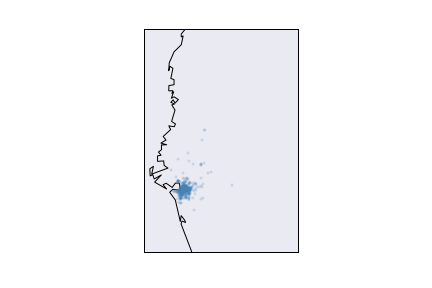
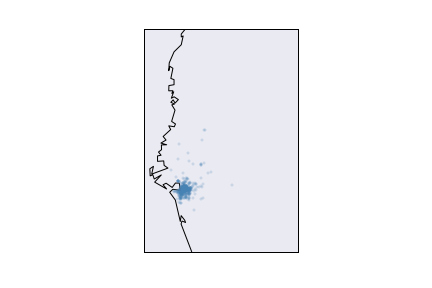
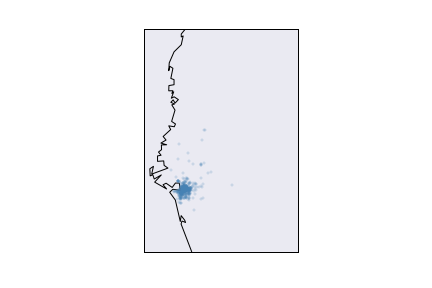
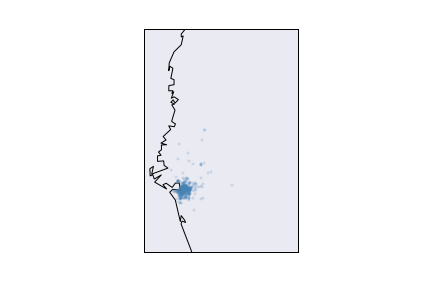
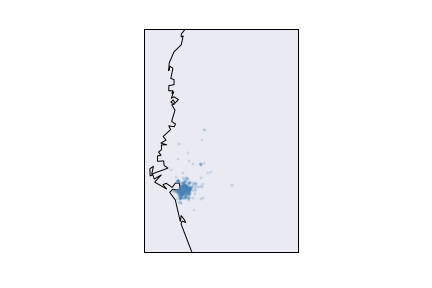
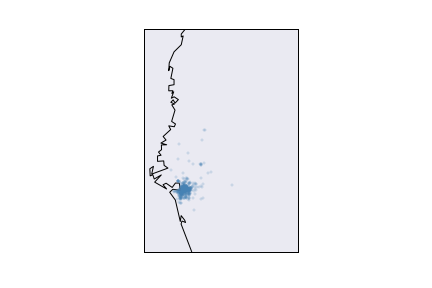
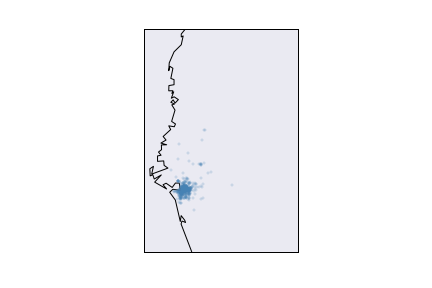
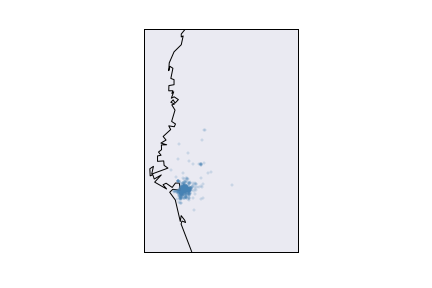
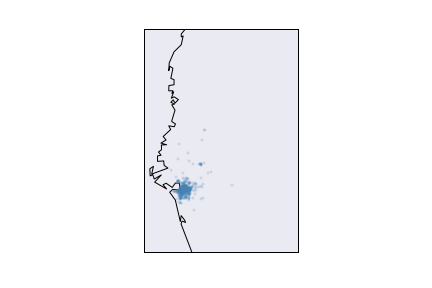
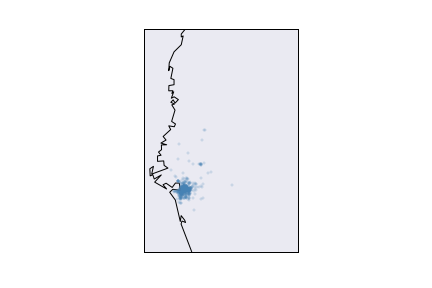
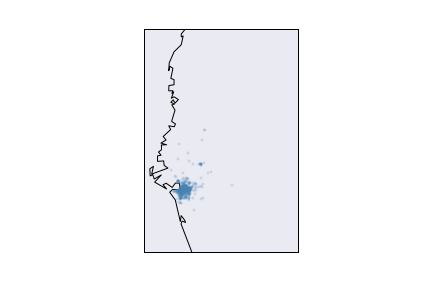
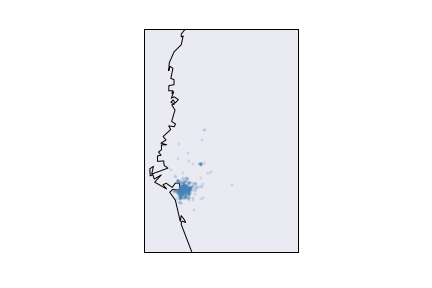
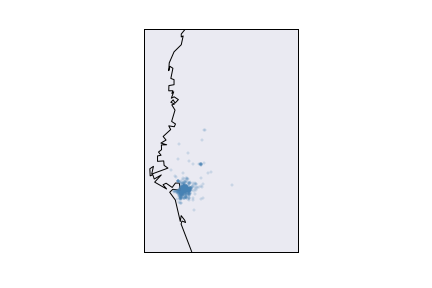
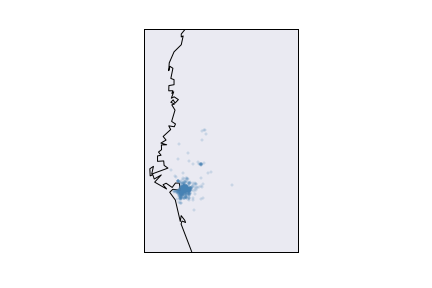
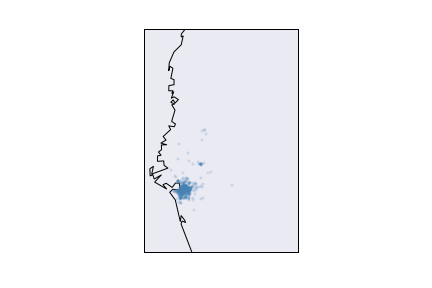
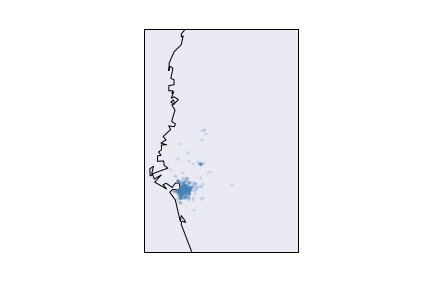
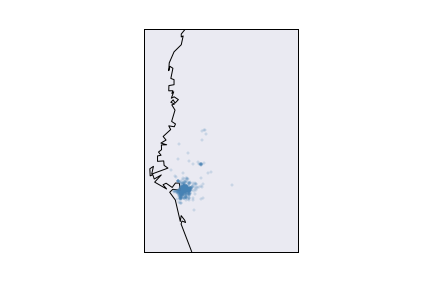
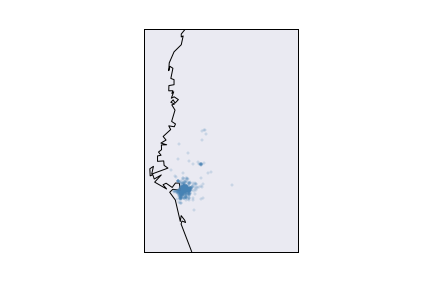
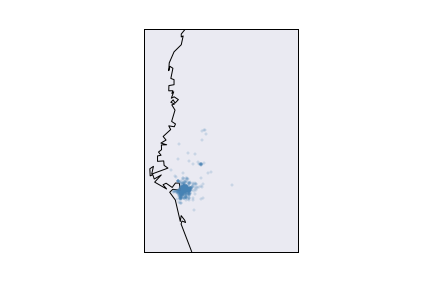
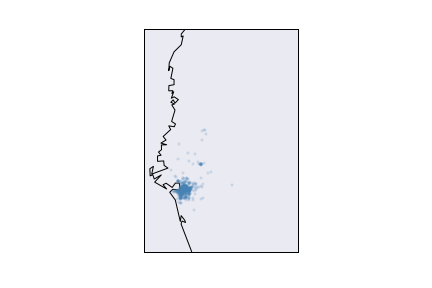
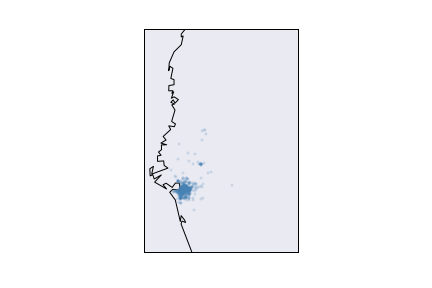
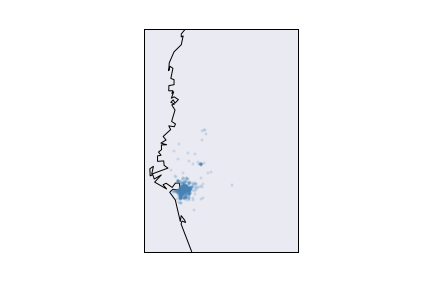
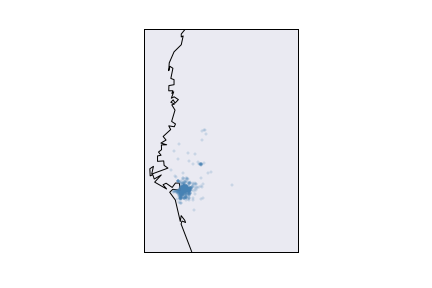
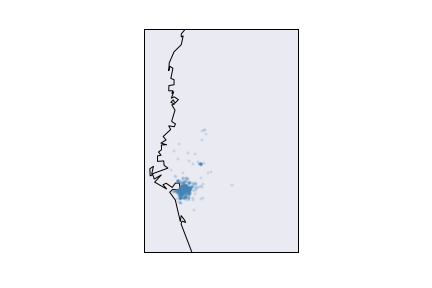
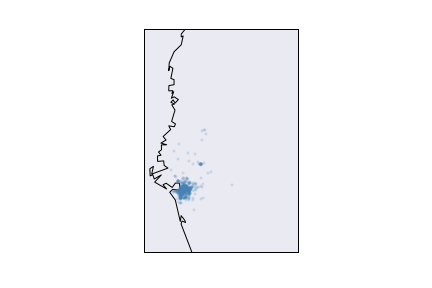
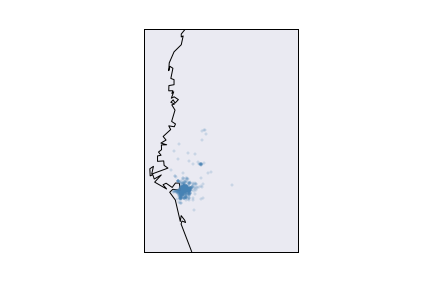
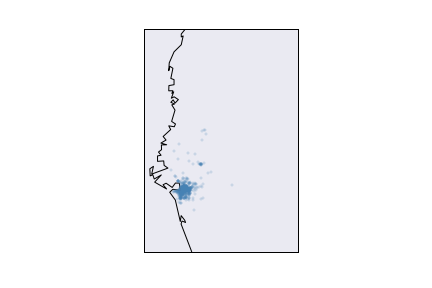
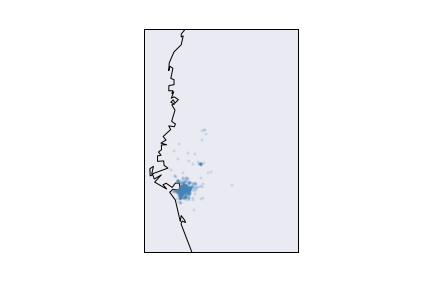
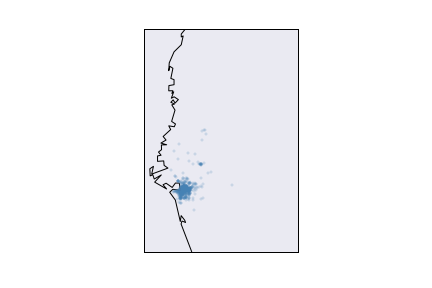
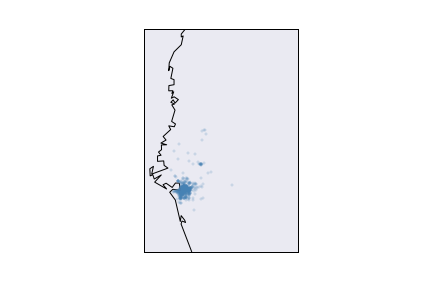
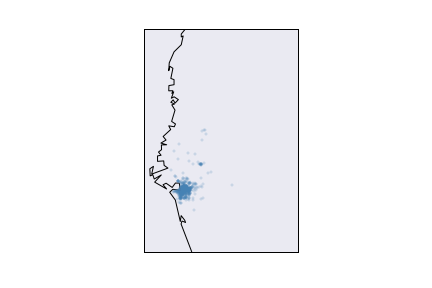
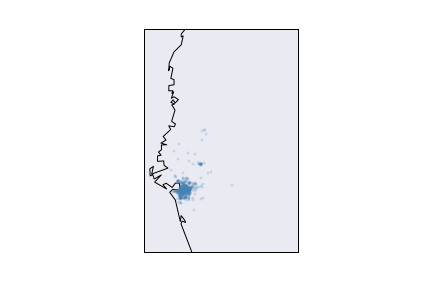
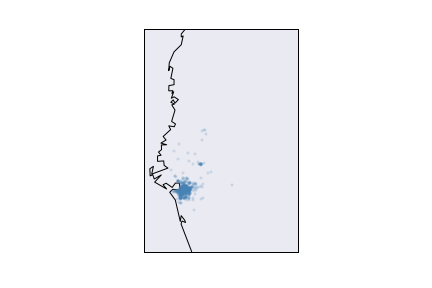
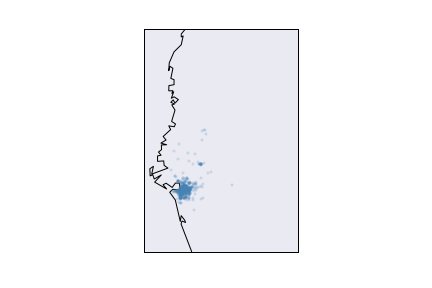
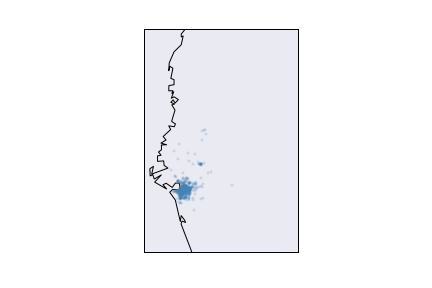
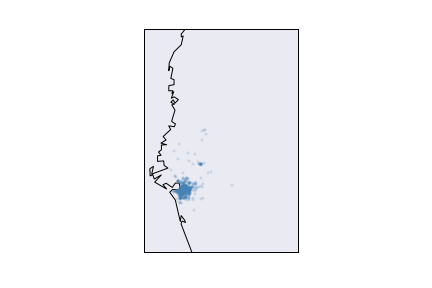
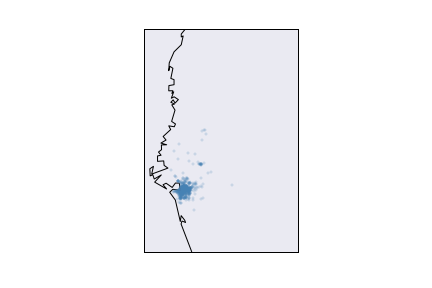
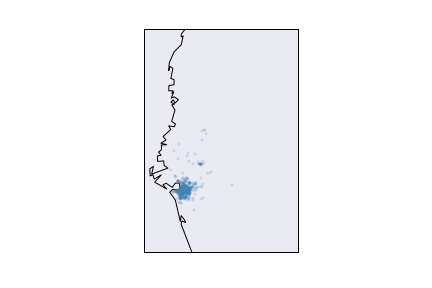
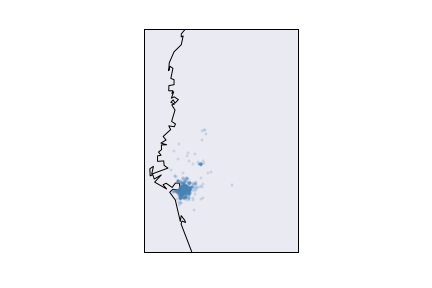
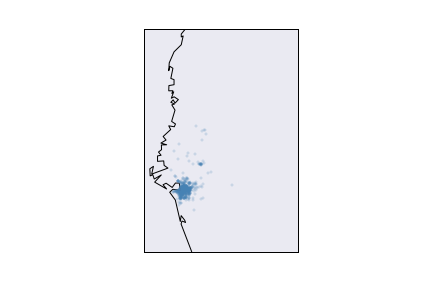
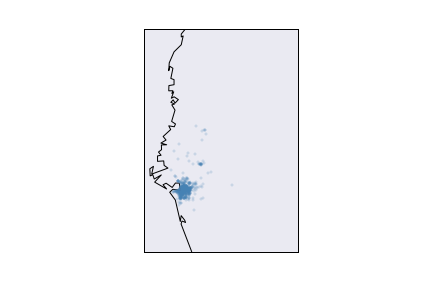
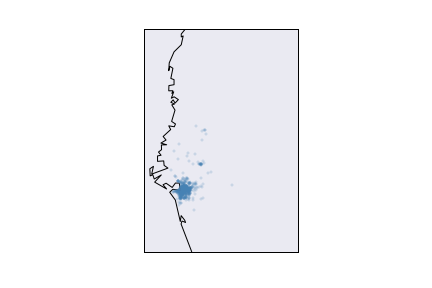
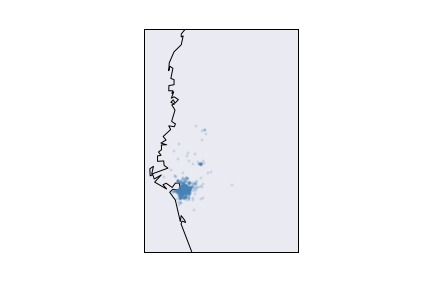
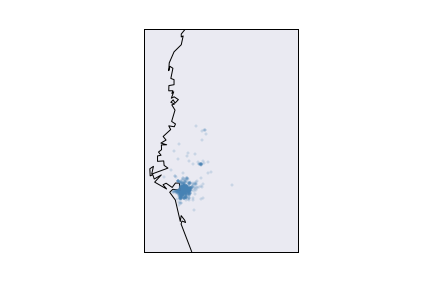
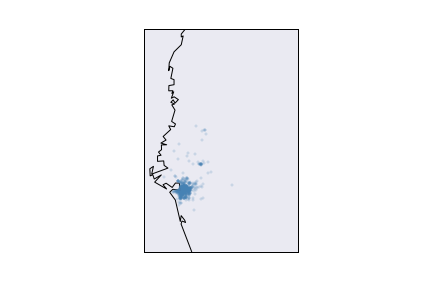
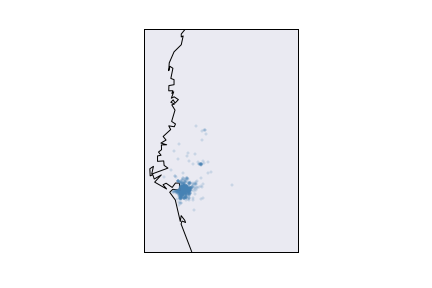
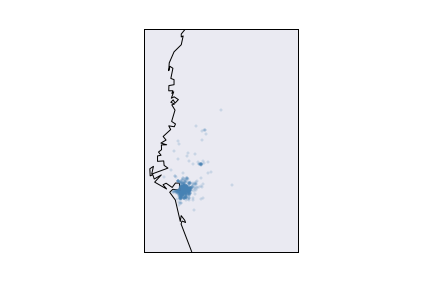
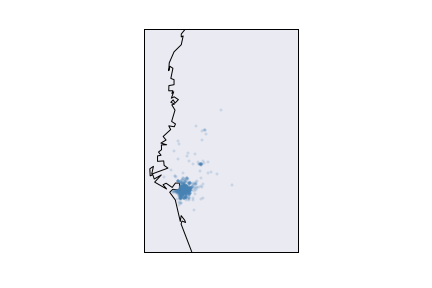
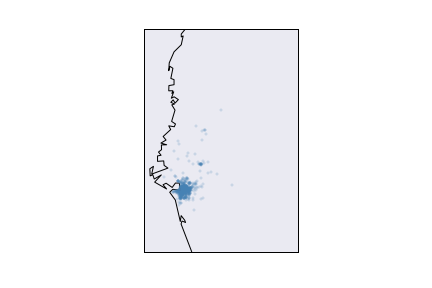
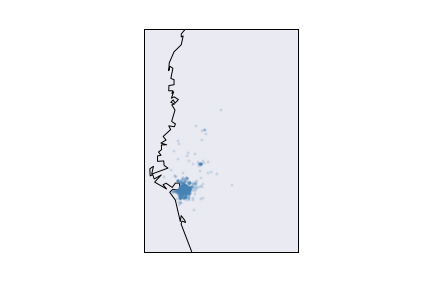
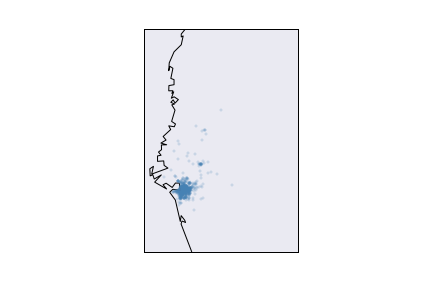
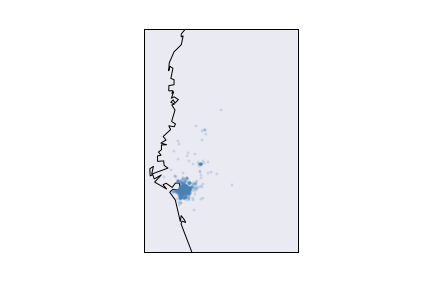
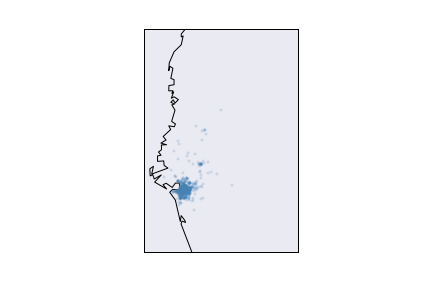
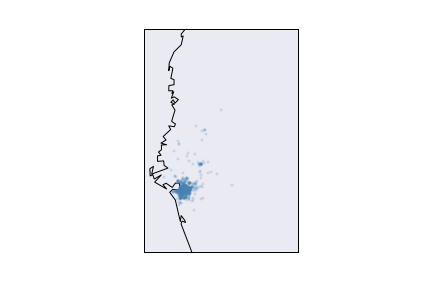
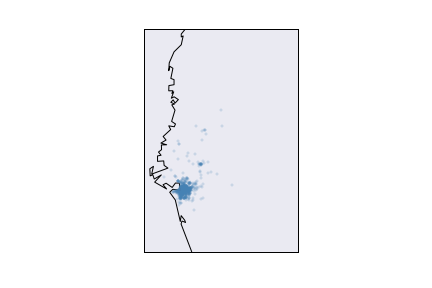
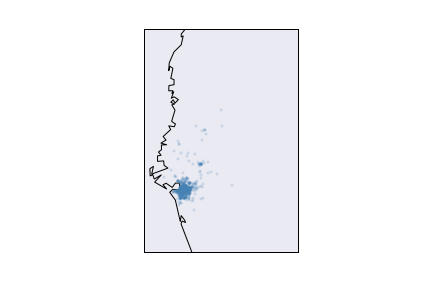
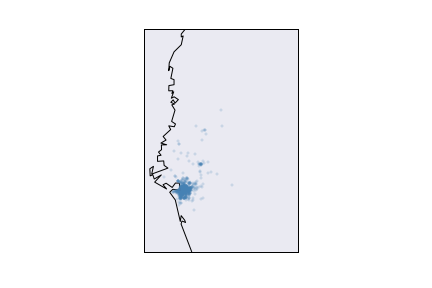
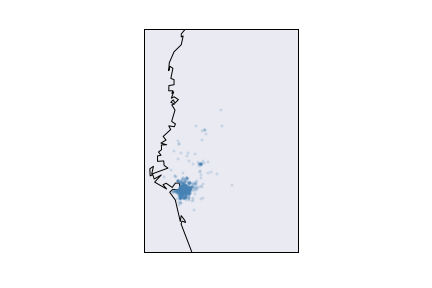
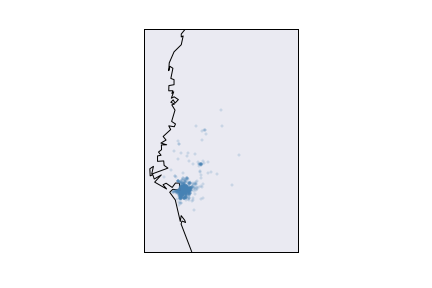
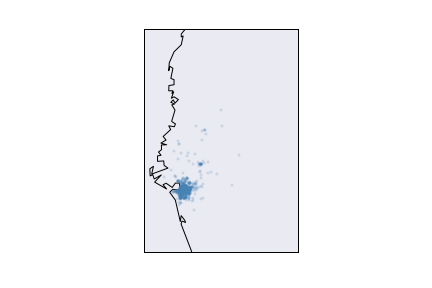
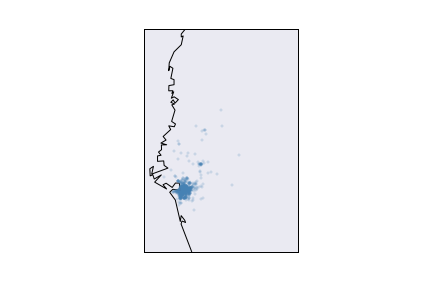
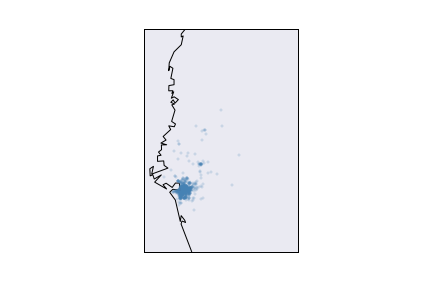
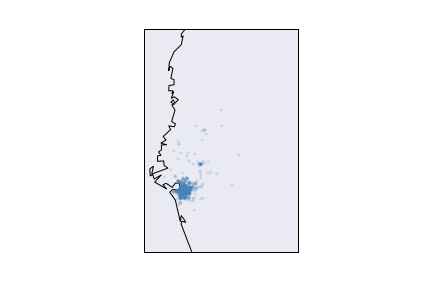
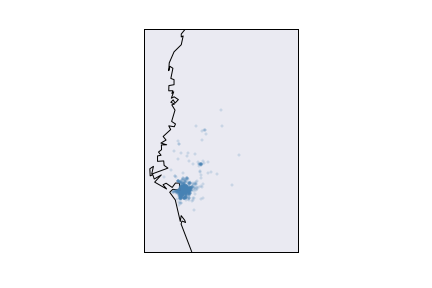
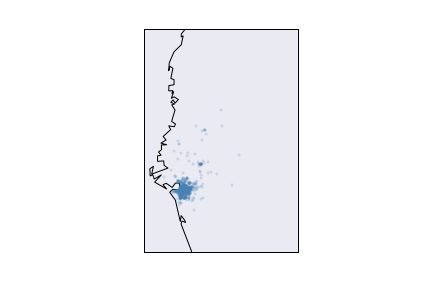
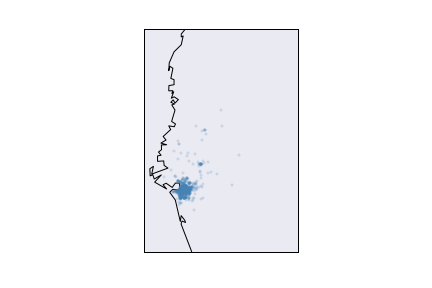
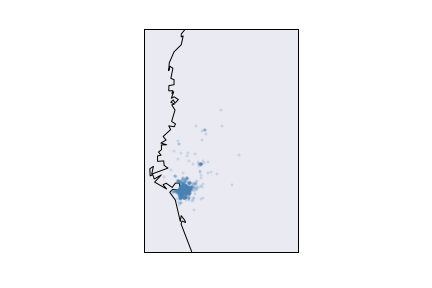
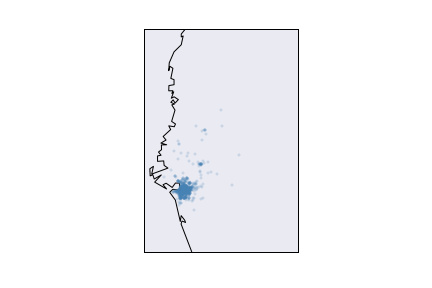
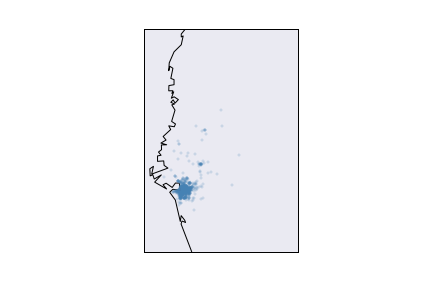
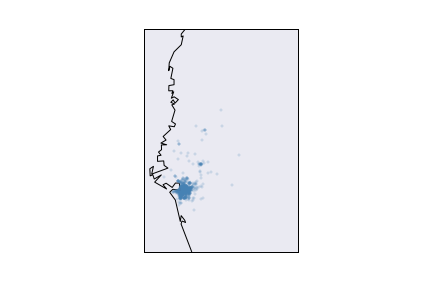
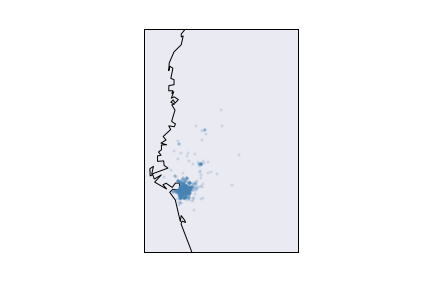
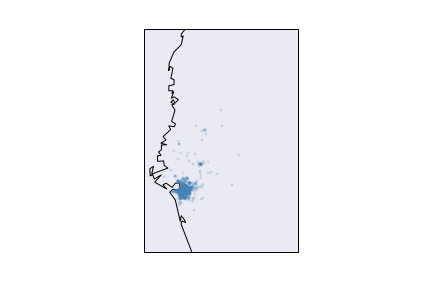
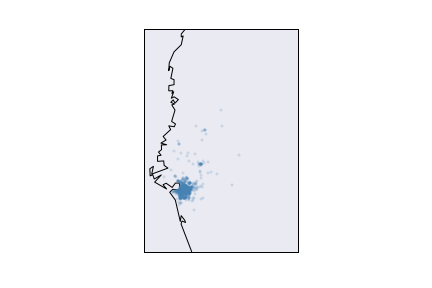
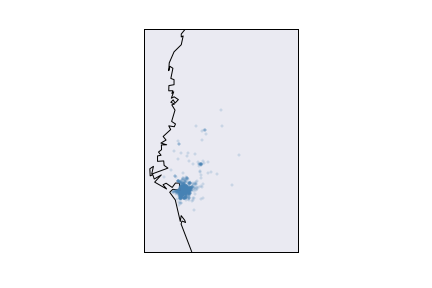
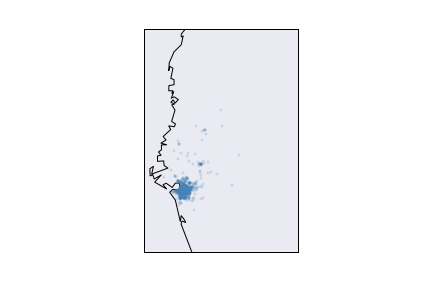
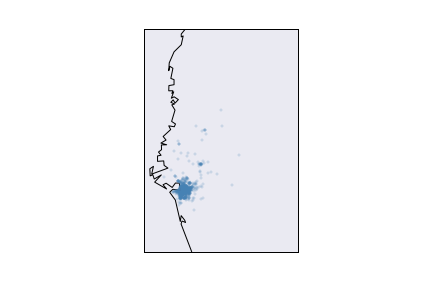
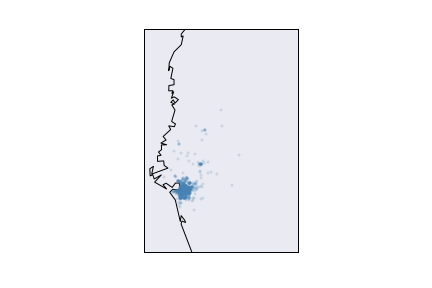
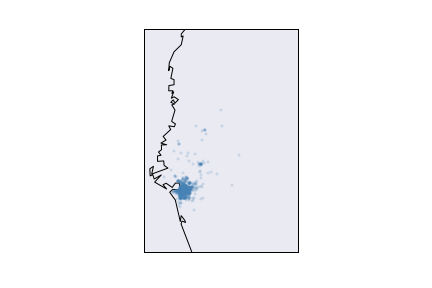
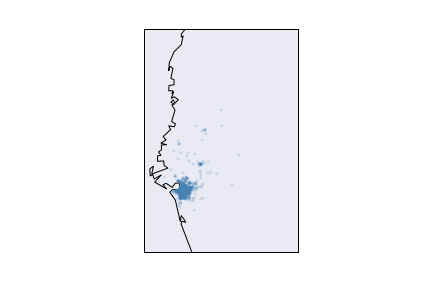
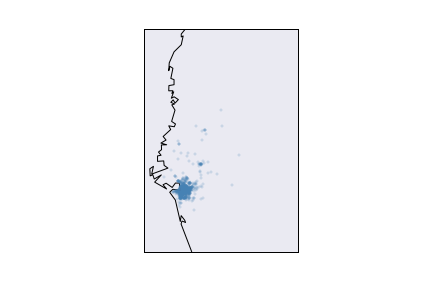
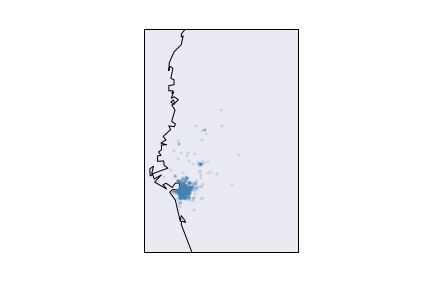
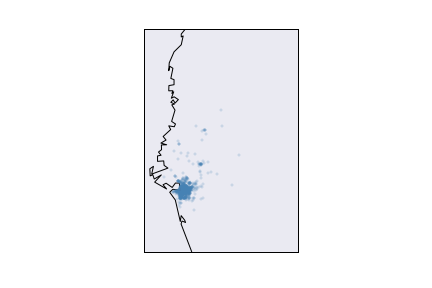
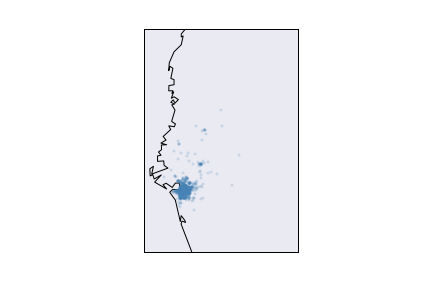
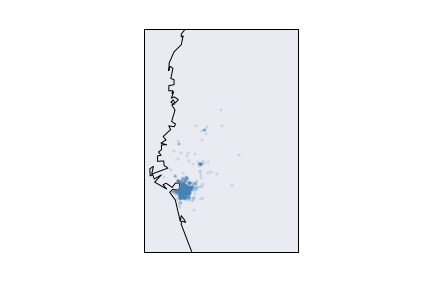
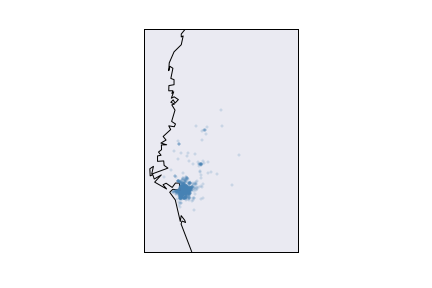
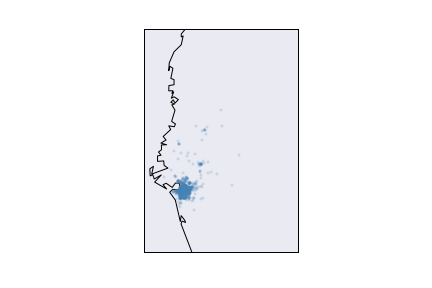
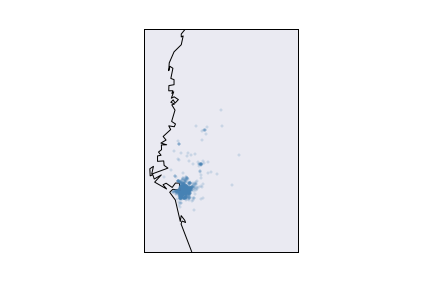
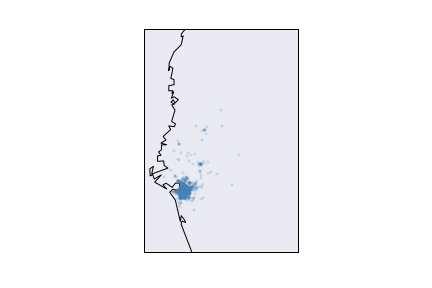
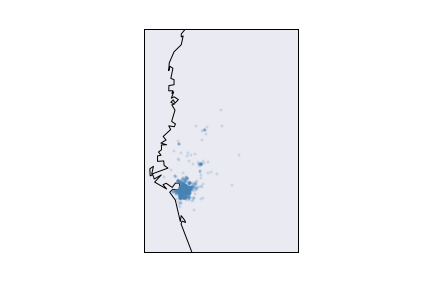
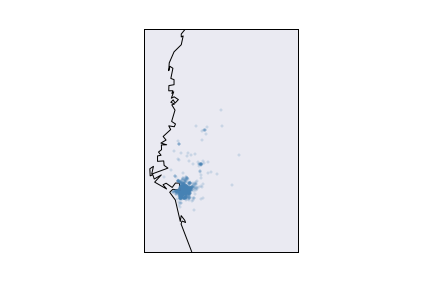
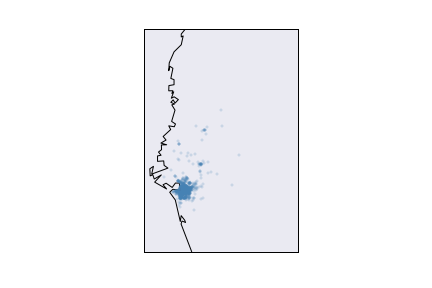
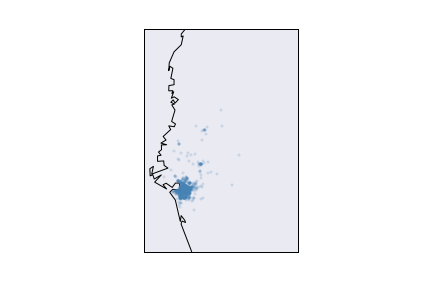
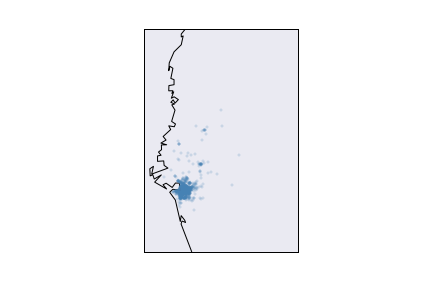
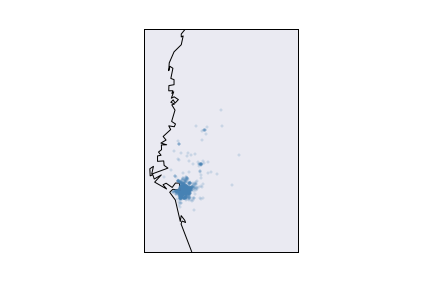
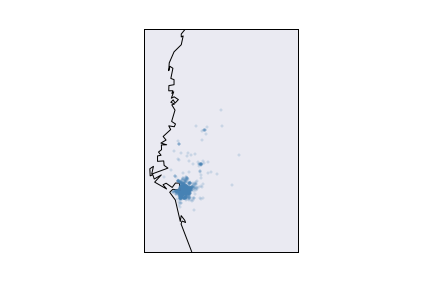
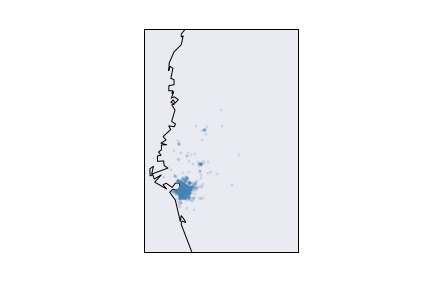
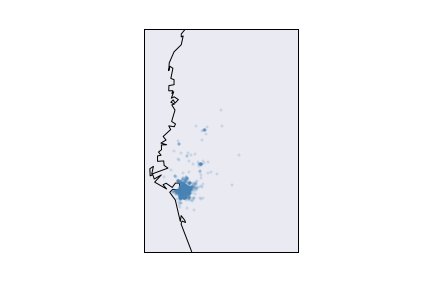
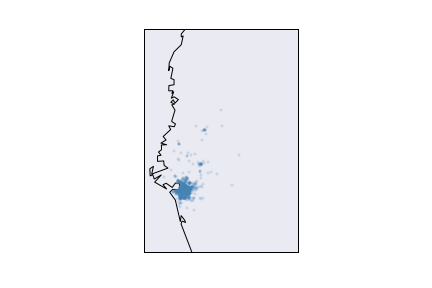
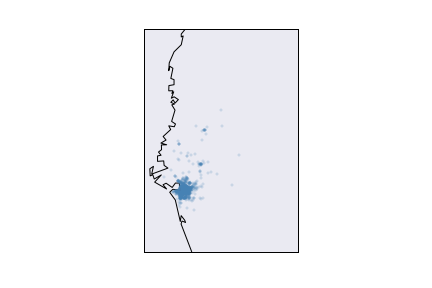
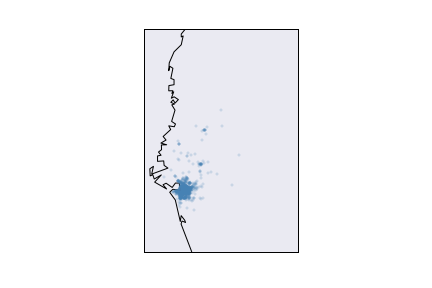
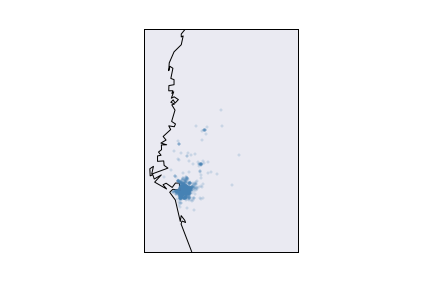
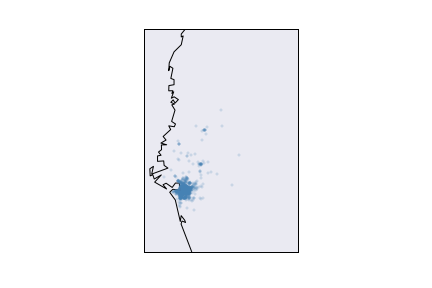
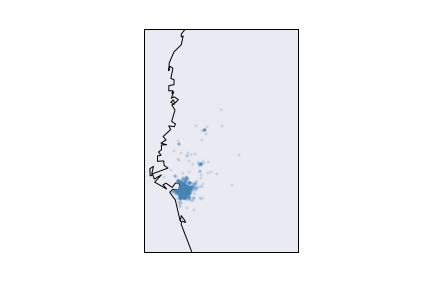
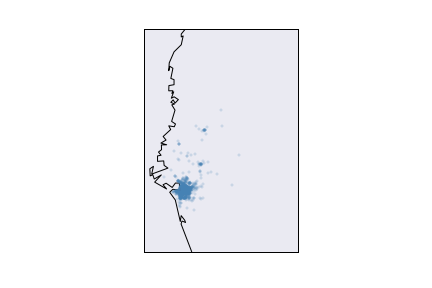
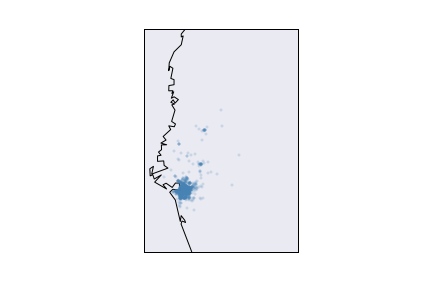
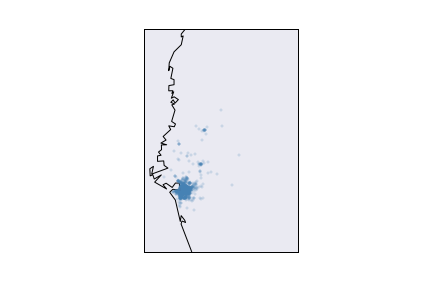
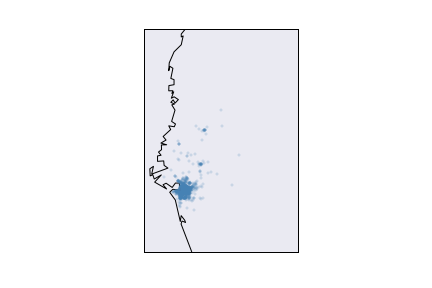
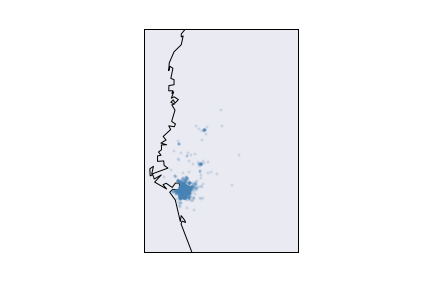
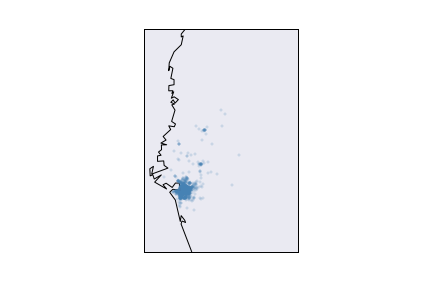
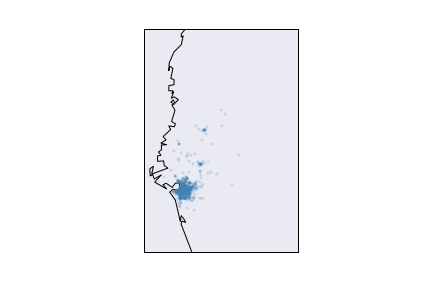
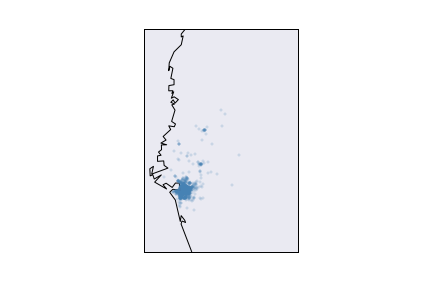
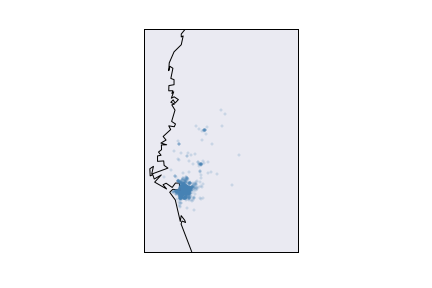
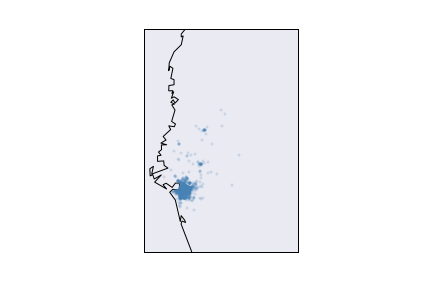
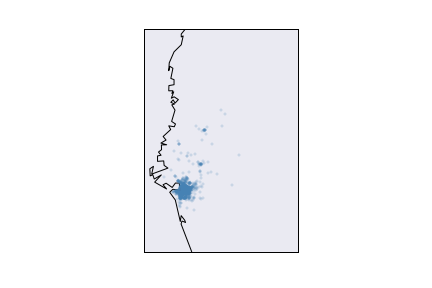
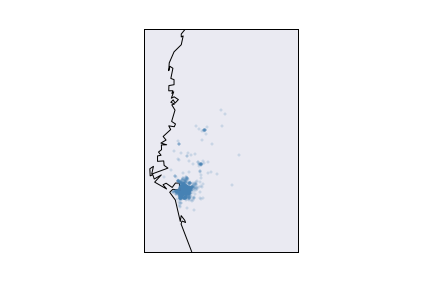
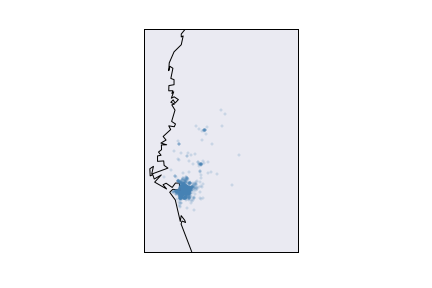
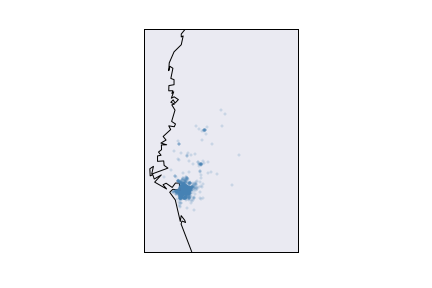
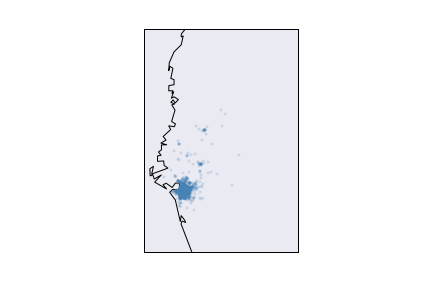
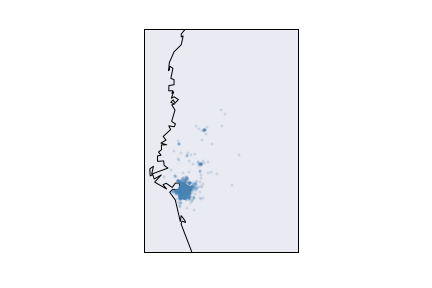
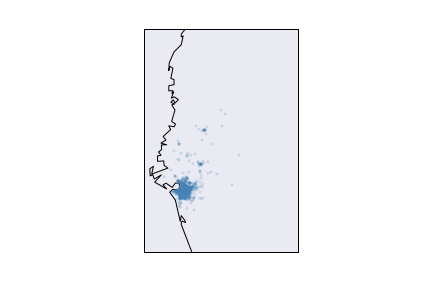
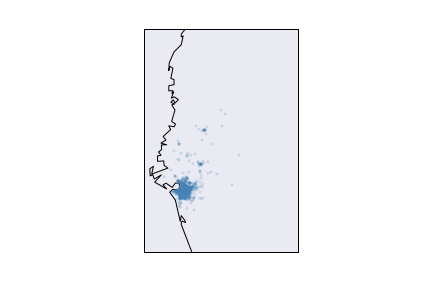
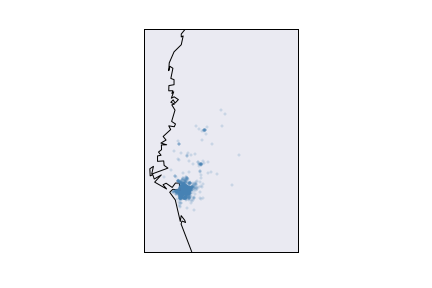
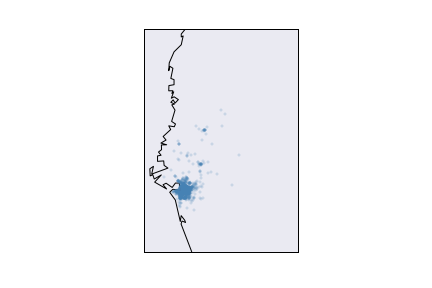
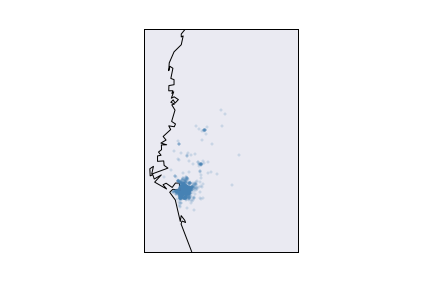
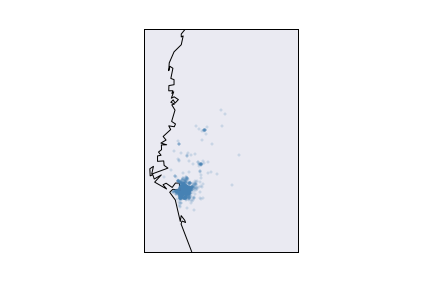
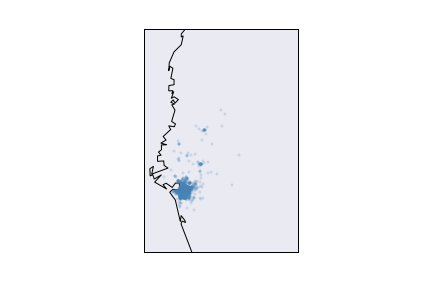
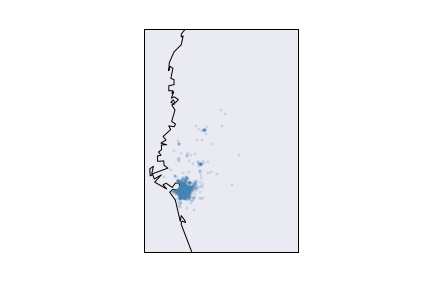
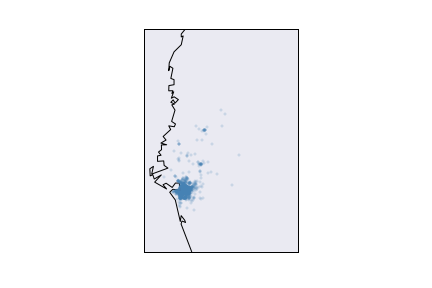
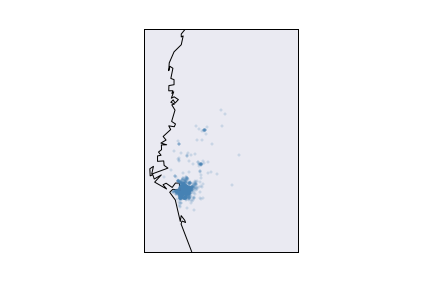
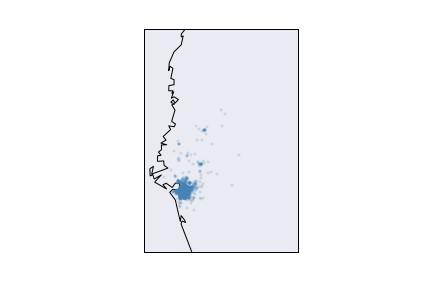
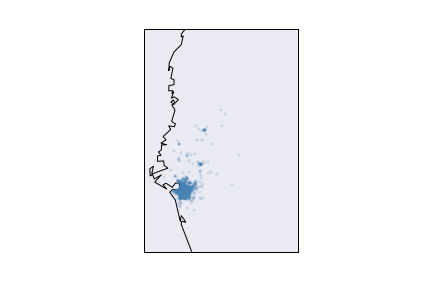
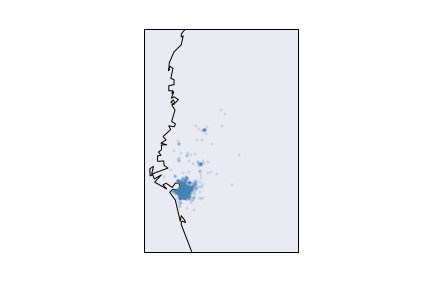
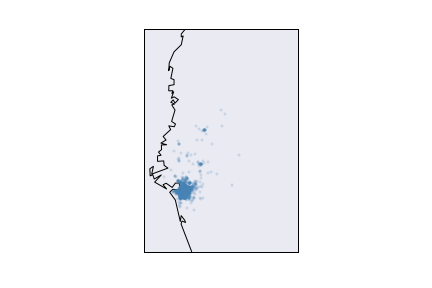

In [17]:
map = Basemap(projection='mill', resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8, lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()
num=10

x,y = map(0, 0)
points = map.plot(x, y, 'ro', markersize=3, color="steelblue",alpha=0.2)[0]

def init():
    points.set_data([], [])
    return points,

def animate(i):
    x, y = map(lons[:10*i+num], lats[:10*i+num])
    points.set_data(x, y)
    return points,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=200, interval=200, blit=True)

Data Animated
---
One picture is better than one thousand of words; a animation is better than one thousand of pictures!

There are many solutions to animation of data; this is same to IPython notebook environment. However, some inevitable technical problems restrict what we can do: 

- what kinds of browser used: differnt browser supports different playing format, mp4 can not play by Mac's safari, quicktime movie can play Firefox, Chrome; The worst is that playing formats are also dependent on what kind of operation system works;  

- what kinds of third-party multimedia tool used to implement result. 

For almost browsers and operation systems, picture formats are fully supports without doubt. Here, we use the simplest and native solution to implement the data animation:
```html
use "python" to create picture at each consective time, save it in certain directory, and use "html/javascript" to display picture by picture, i.e. animation playing. 
```
This comes some advantages:
- browser independent since it is standard HTML/javascript implement; 
- working sheet would not be grown too big to play, snice all the pictures are saved in elsewhere independently. 

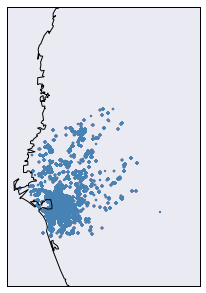

In [18]:
fig = plt.figure(figsize=(5,5)) 
map = Basemap(projection='mill' , 
                              resolution='h' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()

map.drawmapboundary()

for i in np.arange(round(len(lons)/100-1)):
    map.scatter(lons[:3+100*i], lats[:3+i*100], latlon=True,
          s=3, marker='o',  color="steelblue", alpha=0.8); 
    plt.savefig("mapdata/base%05d.png" %i, dpi=75)

In [20]:
round(len(lons)/10)-1

2049

In [21]:
def html_movie(plotfiles, interval_ms=300, width=400, height=500,casename='movie'):
    import os
    if not isinstance(plotfiles, (tuple,list)):
        raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
                        (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    if missing_files:
        raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])

    ext = os.path.splitext(plotfiles[0])[-1]
    if ext == '.png' or ext == '.jpg' or ext == '.jpeg' or ext == 'gif':
        pass
    else:
        raise ValueError('Plotfiles (%s, ...) must be PNG files with '\
                         'extension .png' % plotfiles[0])
        
    header = """\
<html>
<head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width" />
</head>
<style type="text/css">
    body { 
       margin: 10; 
       padding: 10
     }
    input{
       font-family:  Georgia, serif;
       font-size: 1em; /* 20px / 10px */
       color: #000 ;
       background-color: #ffb200 ;    
       border: 2px outset #b37d00 ;
       border-radius: 10px;
       width: 60px ;
       text-decoration: none ;
       background-color: #9cf ;
       border-top: 1px solid #c0ffff ;
       border-right: 1px solid #00f ;
       border-bottom: 1px solid #00f ;
       border-left: 1px solid #c0ffff ;
    }
    .push-down{
       border: 1px solid #38538c;
       background-color: #9cf;
       //color: #FFFFFF;
       text-shadow: 0px -1px 1px #213052;
       box-shadow: inset 0 1px 10px 1px #5D88E3, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:hover{
       background: transparent;
       box-shadow: inset 0 0px 20px 1px #88ADFC, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:active{
       box-shadow: inset 0 1px 10px 1px #5B89EB, 0 1px 0 #1A2847, 0 2px 0 #1C2D4D, 0px 3px 6px rgba(0,0,0,.9);
       margin-top: 10px;
    } 
</style> 
<body>
<div align="center">
"""
    no_images = len(plotfiles)
    jscode = """
<script language="Javascript">
<!---
var num_images_%(casename)s = %(no_images)d;
var img_width = %(width)d;
var img_height = %(height)d;
var interval = %(interval_ms)d;
var images_%(casename)s = new Array();

function preload_images_%(casename)s()
{
   t = document.getElementById("progress");
""" % vars()

    i = 0
    for fname in plotfiles:
        jscode += """
   t.innerHTML = "Preloading image ";
   images_%(casename)s[%(i)s] = new Image(img_width, img_height);
   images_%(casename)s[%(i)s].src = "%(fname)s";
        """ % vars()
        i = i+1
    jscode += """
   t.innerHTML = "";
}

function tick_%(casename)s()
{
   if (frame_%(casename)s > num_images_%(casename)s - 1)
       frame_%(casename)s = 0;

   document.movie.src = images_%(casename)s[frame_%(casename)s].src;
   frame_%(casename)s += 1;
   tt = setTimeout("tick_%(casename)s()", interval);
}

function startup_tmpmovie()
{
   preload_images_%(casename)s();
   frame_%(casename)s = 0;
   setTimeout("tick_%(casename)s()", interval);
}

function stopit()
{ clearTimeout(tt); }

function restart_tmpmovie()
{ tt = setTimeout("tick_%(casename)s()", interval); }

function slower()
{ interval = interval/0.7; }

function faster()
{ interval = interval*0.7; }

// --->
</script>
""" % vars()
    plotfile0 = plotfiles[0]
    form = """
<form>
&nbsp;
<input type="button" class="push-down" value="Play" onClick="startup_tmpmovie()">
<input type="button" class="push-down" value="Pause" onClick="stopit()">
<input type="button" class="push-down" value="Replay" onClick="restart_tmpmovie()">
&nbsp;
<input type="button" class="push-down" value="Slower" onClick="slower()">
<input type="button" class="push-down" value="Faster" onClick="faster()">
</form>

<p><div ID="progress"></div></p>
<img src="%(plotfile0)s" name="movie" border=2/></div>
""" % vars()
    footer = '\n</body>\n</html>\n'
    #print(footer)
    return header, jscode, form, footer

In [22]:
def movieHTML(files, interval_ms=300, width=400, height=500,output='movie'):
    import os,glob,re
    #if not isinstance(plotfiles, (tuple,list)):
    #    raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
    #                    (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    #missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    #if missing_files:
    #    raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])
    #
    # Don't make movie file, just an html file that can play png files
    #files = self._prop['input_files']
    if isinstance(files, str):
       files = glob.glob(files)
       files.sort()
    #print '\nMaking HTML code for displaying', ', '.join(files)
    fps = 25;
    interval_ms = 1000.0/fps
    #outf = self._prop['output_file']
    
    if output is None:
       output = 'test'
       
    #html_movie(files, interval_ms, casename=casename)   
    
    
    header, jscode, form, footer = html_movie(files, interval_ms, casename=output)
    casename = os.path.splitext(output)[0] + '.html'
    print(casename)
    f = open(casename, 'w')
    f.write(header + jscode + form + footer)
    f.close()

In [23]:
movieHTML("mapdata/base*.png")

movie.html


In [24]:
from IPython.core.display import HTML
filename="movie.html"
HTML('<div align="center"><iframe src=%s width=500, height=500></iframe></div>' %filename)

PCA Introduction
---

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. It can be used to find out the trends behind infrustrated data. What PCA seeks to do is to find the Principal Axes in the data ( $X-Y$ axes in 2 dimensions, for instance), and explain how important those axes are in describing the spread distribution of data which discussed here.





Orthogonality of Data 
---
Assume that Standard Gaussian vector $Z=(Z_i)$  are Standard Gaussian vector, and we want  $X=(X_i)$ are a general Gaussian vector with correlation matrix $C = (C_{ij})$. 

As well-known, unit vector, $e^i=(e^i_1,e^i_2,\cdots)$, is eigenvector if $e^i \cdot C = \lambda_i e^i$, with the $\lambda_i$ being the eigenvalues (we use row vectors, hence we multiply from the left). We know that those eigenvectors are orthonormal, ie $e^i \cdot e^j = \delta_{ij}$ where $\delta$ is the well known Kronecker delta.

Now define the vector $X=(X_i)$ as follows:
$$
X = \sum_\mu \sqrt{\lambda_\mu} e^\mu Z_\mu
$$
and the covariance of the $X$ that we want to call $\bar{C}$ for the time is
$$
\bar{C}_{ij} = E[X_i X_j] = \sum_{\mu\nu} \sqrt{\lambda_\mu \lambda_\nu} e^\mu_i e^\nu_j E[Z_\mu Z_\nu]=\sum_{\mu}\lambda_\mu e^\mu_i e^\mu_j
$$
We now multiply the vector $e^i$ from the left
$$
(e^i \bar{C})_j = \sum_\nu e^i_\nu \bar{C}_{\nu j} = \sum_{\nu\mu}\lambda_\mu e^i_\nu e^\mu_\nu e^\mu_j = \sum_\mu \lambda_\mu \delta_{i\mu} e^\mu_j = \lambda_i e^i_j
$$
and we find that the matrix $\bar{C}$ satisfies for all $e^i$ the above eigenvector equation $e^i \cdot \bar{C} = \lambda_i e^i$. Because the $e^i$ form a basis we know that $\bar{C}=C$.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats


In [26]:
L=np.zeros([len(lons),2])
for i in np.arange(len(lons)):
    L[i,0],L[i,1]=lons[i],lats[i]

In [27]:
# Replace the uncertain data, nan, with its former one
# L[2654,0]=L[2653,0]
L[2564,0]=L[2563,0]
np.mean(L[:,0])
#print(L[2564:2600,0])

120.21152099692728

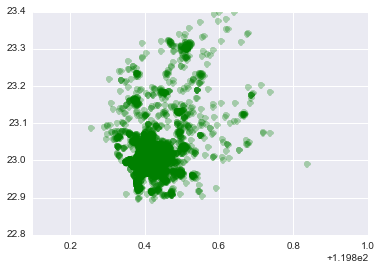

In [28]:
plt.plot(L[:,0], L[ :,1], 'og',alpha=0.3)
plt.axis('equal');

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#pca.fit(L[:len(L):10])
pca.fit(L)

print(pca.explained_variance_)
print(pca.components_)

[ 0.00196806  0.00070514]
[[ 0.4116225   0.91135444]
 [ 0.91135444 -0.4116225 ]]


In [30]:
Lx=max(L[:,0])-min(L[:,0])
Ly=max(L[:,1])-min(L[:,1])
Lx,Ly

(0.58099999999998886, 0.50600000000000023)

1.14656266445
-0.424233662343


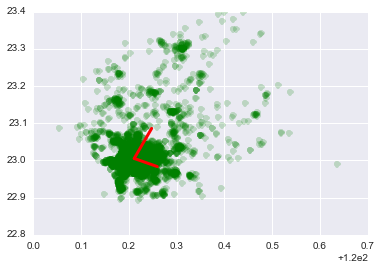

In [31]:
plt.plot(L[ :,0], L[:,1], 'og', alpha=0.2)

# relocation the center to the mean of (lons,lats)
x_mean,y_mean=np.mean(L[:,0]),np.mean(L[:,1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    #v = vector * [Lx,Ly] *5* np.sqrt(length)
    v = vector * np.sqrt(length)*2

    print(np.arctan(v[1]/v[0]))
    plt.plot([x_mean, x_mean+v[0]], [y_mean, y_mean+v[1]], '-k', lw=3,color='red')
#plt.axis('equal');

Note that one of the direction is much prior to the other; we can ignore the latter one more or less. Let us observe 
what the data look like if 80% variance keeps: 

In [40]:
clf = PCA(0.725)
L_trans = clf.fit_transform(L)
print(L.shape)
print(L_trans.shape)

(20503, 2)
(20503, 1)


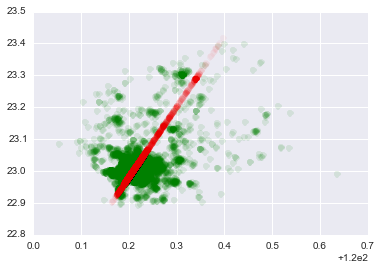

In [41]:
L_new = clf.inverse_transform(L_trans)
plt.plot(L[:, 0], L[:, 1], 'og', alpha=0.1)
plt.plot(L_new[:, 0], L_new[:, 1], 'or', alpha=0.04)
#plt.axis('equal');

1.14656266445


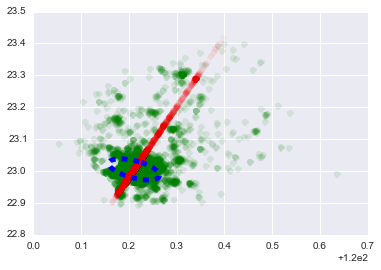

In [42]:
rL=np.sqrt(pca.components_[0][0]**2+pca.components_[0][1]**2)
r1=pca.components_[0][0]/rL/16.
r2=pca.components_[0][1]/rL/16.
print(np.arctan(r2/r1))
theta0=np.arctan(pca.components_[0][1]/pca.components_[0][0])

cx,cy=x_mean,y_mean
rparam=np.linspace(0,2*np.pi,100)

rx=r1*np.cos(rparam)*np.cos(theta0)-r2*np.sin(rparam)*np.sin(theta0)
ry=+r1*np.cos(rparam)*np.sin(theta0)+r2*np.sin(rparam)*np.cos(theta0)

#L_new = clf.inverse_transform(L_trans)
plt.plot(L[:, 0], L[:, 1], 'og', alpha=0.1)
plt.plot(L_new[:, 0], L_new[:, 1], 'or', alpha=0.04)
plt.plot(cx+rx,cy+ry,'b--',lw=5)
#plt.axis('equal');

Conclusion
---
The data is now compressed by a factor of 50%, from array (5263,2) to (5263,1), after throwing away 27.5% of the variance! The dimensionality reduction is quite efficient. 

In [58]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
#css_file = '../styles/numericalmoocstyle.css'
css_file = '../styles/custom.css'
HTML(open(css_file, "r").read())

In [12]:
!ipython nbconvert maps.ipynb

[NbConvertApp] Converting notebook maps.ipynb to html
[NbConvertApp] Writing 356116 bytes to maps.html


In [57]:
import sys
print(sys.version)

3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
